In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',None)

# PROBLEM STATEMENT

This project aims to leverage Exploratory Data Analysis (EDA)and machine learning to conduct risk analysis for
loan default prediction in the context of a consumer finance company. By analyzing historical loan application data, 
we will identify patterns and factors that indicate whether a client is likely to default on their loan payments. 
This analysis will assist the company in minimizing financial losses while ensuring that creditworthy applicants are
not unfairly rejected.

In [39]:
df1=pd.read_csv(r"C:\Users\SKAN\Downloads\previous_application.csv")

In [40]:
df1

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.000000,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,Y,1,0.000000,NaN,NaN,XAP,Approved,-544,Cash through the bank,XAP,NaN,Refreshed,Furniture,POS,XNA,Stone,43,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,Y,1,0.340554,NaN,NaN,XAP,Approved,-1694,Cash through the bank,XAP,Unaccompanied,New,Furniture,POS,XNA,Stone,43,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,Y,1,0.101401,NaN,NaN,XAP,Approved,-1488,Cash through the bank,XAP,"Spouse, partner",Repeater,Consumer Electronics,POS,XNA,Country-wide,1370,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,Y,1,NaN,NaN,NaN,XNA,Approved,-1185,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [41]:
df2=pd.read_csv(r"C:\Users\SKAN\Downloads\application_data.csv")

In [42]:
df2

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [43]:
sample_df=pd.merge(df1,df2,on='SK_ID_CURR',how='left')

In [44]:
sample_df

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE_x,AMT_ANNUITY_x,AMT_APPLICATION,AMT_CREDIT_x,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_x,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_x,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,TARGET,NAME_CONTRACT_TYPE_y,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_y,AMT_ANNUITY_y,AMT_GOODS_PRICE_y,NAME_TYPE_SUITE_y,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.000000,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0,0.0,Cash loans,F,N,Y,1.0,225000.0,533668.5,25803.0,477000.0,Unaccompanied,State servant,Incomplete higher,Married,House / apartment,0.046220,-14443.0,-7392.0,-8447.0,-4120.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,NaN,3.0,1.0,1.0,TUESDAY,17.0,0.0,1.0,1.0,0.0,0.0,0.0,Military,NaN,0.683797,NaN,0.0557,0.0249,0.9821,0.7552,0.0736,0.04,0.0345,0.3333,0.3750,0.0117,0.0454,0.0456,0.0000,0.0202,0.0567,0.0258,0.9821,0.7648,0.0743,0.0403,0.0345,0.3333,0.3750,0.0120,0.0496,0.0475,0.0000,0.0214,0.0562,0.0249,0.9821,0.7585,0.0741,0.04,0.0345,0.3333,0.3750,0.0119,0.0462,0.0464,0.0000,0.0207,reg oper account,block of flats,0.0403,"Stone, brick",No,3.0,0.0,3.0,0.0,-548.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,60

In [45]:
df = sample_df.sample(n=100000, random_state=42)

In [46]:
df

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE_x,AMT_ANNUITY_x,AMT_APPLICATION,AMT_CREDIT_x,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_x,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_x,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,TARGET,NAME_CONTRACT_TYPE_y,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_y,AMT_ANNUITY_y,AMT_GOODS_PRICE_y,NAME_TYPE_SUITE_y,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
876718,1327604,127360,Consumer loans,5318.100,27616.5,26082.0,2763.0,27616.5,WEDNESDAY,10,Y,1,0.104322,NaN,NaN,XAP,Approved,-1210,Cash through the bank,XAP,NaN,New,Mobile,POS,XNA,Country-wide,384,Consumer electronics,6.0,high,POS household with interest,365243.0,-1174.0,-1024.0,-1024.0,-1017.0,0.0,0.0,Cash loans,F,N,Y,4.0,150750.0,360000.0,19660.5,360000.0,Family,Working,Incomplete higher,Separated,House / apartment,0.018029,-14432.0,-106.0,-3010.0,-3946.0,NaN,1.0,1.0,1.0,1.0,1.0,0.0,Sales staff,5.0,3.0,3.0,TUESDAY,8.0,0.0,0.0,0.0,0.0,1.0,1.0,Business Entity Type 3,0.498776,0.263144,0.385915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1210.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0
1463966,1830718,218834,Cash loans,19737.945,135000.0,165226.5,NaN,135000.0,WEDNESDAY,8,Y,1,NaN,NaN,NaN,XNA,Approved,-1223,XNA,XAP,Unaccompanied,New,XNA,Cash,walk-in,Credit and cash offices

In [47]:
df.shape

(100000, 158)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 876718 to 1246098
Columns: 158 entries, SK_ID_PREV to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(120), int64(6), object(32)
memory usage: 121.3+ MB


In [49]:
df.isnull().sum().sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED       99625
RATE_INTEREST_PRIMARY          99625
COMMONAREA_MODE                74318
COMMONAREA_MEDI                74318
COMMONAREA_AVG                 74318
                               ...  
NAME_CONTRACT_STATUS               0
NAME_CASH_LOAN_PURPOSE             0
NFLAG_LAST_APPL_IN_DAY             0
FLAG_LAST_APPL_PER_CONTRACT        0
SK_ID_PREV                         0
Length: 158, dtype: int64

In [50]:
for col in df.columns:
    if df[col].dtype=='object':       
        print(col)
        print(df[col].isnull().sum())

NAME_CONTRACT_TYPE_x
0
WEEKDAY_APPR_PROCESS_START_x
0
FLAG_LAST_APPL_PER_CONTRACT
0
NAME_CASH_LOAN_PURPOSE
0
NAME_CONTRACT_STATUS
0
NAME_PAYMENT_TYPE
0
CODE_REJECT_REASON
0
NAME_TYPE_SUITE_x
49008
NAME_CLIENT_TYPE
0
NAME_GOODS_CATEGORY
0
NAME_PORTFOLIO
0
NAME_PRODUCT_TYPE
0
CHANNEL_TYPE
0
NAME_SELLER_INDUSTRY
0
NAME_YIELD_GROUP
0
PRODUCT_COMBINATION
28
NAME_CONTRACT_TYPE_y
15193
CODE_GENDER
15193
FLAG_OWN_CAR
15193
FLAG_OWN_REALTY
15193
NAME_TYPE_SUITE_y
15385
NAME_INCOME_TYPE
15193
NAME_EDUCATION_TYPE
15193
NAME_FAMILY_STATUS
15193
NAME_HOUSING_TYPE
15193
OCCUPATION_TYPE
42651
WEEKDAY_APPR_PROCESS_START_y
15193
ORGANIZATION_TYPE
15193
FONDKAPREMONT_MODE
72940
HOUSETYPE_MODE
57356
WALLSMATERIAL_MODE
57973
EMERGENCYSTATE_MODE
55043


In [51]:
for col in df.columns:
    if df[col].dtype=='object': 
        df[col].fillna("Unknown",inplace=True)

In [52]:
for col in df.columns:
    if df[col].dtype=='object':       
        print(col)
        print(df[col].isnull().sum())

NAME_CONTRACT_TYPE_x
0
WEEKDAY_APPR_PROCESS_START_x
0
FLAG_LAST_APPL_PER_CONTRACT
0
NAME_CASH_LOAN_PURPOSE
0
NAME_CONTRACT_STATUS
0
NAME_PAYMENT_TYPE
0
CODE_REJECT_REASON
0
NAME_TYPE_SUITE_x
0
NAME_CLIENT_TYPE
0
NAME_GOODS_CATEGORY
0
NAME_PORTFOLIO
0
NAME_PRODUCT_TYPE
0
CHANNEL_TYPE
0
NAME_SELLER_INDUSTRY
0
NAME_YIELD_GROUP
0
PRODUCT_COMBINATION
0
NAME_CONTRACT_TYPE_y
0
CODE_GENDER
0
FLAG_OWN_CAR
0
FLAG_OWN_REALTY
0
NAME_TYPE_SUITE_y
0
NAME_INCOME_TYPE
0
NAME_EDUCATION_TYPE
0
NAME_FAMILY_STATUS
0
NAME_HOUSING_TYPE
0
OCCUPATION_TYPE
0
WEEKDAY_APPR_PROCESS_START_y
0
ORGANIZATION_TYPE
0
FONDKAPREMONT_MODE
0
HOUSETYPE_MODE
0
WALLSMATERIAL_MODE
0
EMERGENCYSTATE_MODE
0


In [53]:
df.fillna(0,inplace=True)

In [54]:
df

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE_x,AMT_ANNUITY_x,AMT_APPLICATION,AMT_CREDIT_x,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_x,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_x,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,TARGET,NAME_CONTRACT_TYPE_y,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_y,AMT_ANNUITY_y,AMT_GOODS_PRICE_y,NAME_TYPE_SUITE_y,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
876718,1327604,127360,Consumer loans,5318.100,27616.5,26082.0,2763.0,27616.5,WEDNESDAY,10,Y,1,0.104322,0.0,0.0,XAP,Approved,-1210,Cash through the bank,XAP,Unknown,New,Mobile,POS,XNA,Country-wide,384,Consumer electronics,6.0,high,POS household with interest,365243.0,-1174.0,-1024.0,-1024.0,-1017.0,0.0,0.0,Cash loans,F,N,Y,4.0,150750.0,360000.0,19660.5,360000.0,Family,Working,Incomplete higher,Separated,House / apartment,0.018029,-14432.0,-106.0,-3010.0,-3946.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,Sales staff,5.0,3.0,3.0,TUESDAY,8.0,0.0,0.0,0.0,0.0,1.0,1.0,Business Entity Type 3,0.498776,0.263144,0.385915,0.0000,0.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,Unknown,Unknown,0.0000,Unknown,Unknown,0.0,0.0,0.0,0.0,-1210.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0
1463966,1830718,218834,Cash loans,19737.945,135000.0,165226.5,0.0,

In [55]:
df.isnull().sum().sort_values(ascending=False)

SK_ID_PREV                    0
APARTMENTS_MEDI               0
FLOORSMAX_MODE                0
FLOORSMIN_MODE                0
LANDAREA_MODE                 0
                             ..
DAYS_BIRTH                    0
DAYS_EMPLOYED                 0
DAYS_REGISTRATION             0
DAYS_ID_PUBLISH               0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 158, dtype: int64

In [56]:
df.duplicated().sum()

0

In [57]:
df.to_csv(r"C:\Users\SKAN\Desktop\Raajee\fin_risk_new_data1.csv")

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,100000.0,1.922926e+06,531071.982103,1000007.0,1463215.750,1924608.500,2.381664e+06,2845319.00
SK_ID_CURR,100000.0,2.780549e+05,102814.845887,100014.0,188852.000,278154.000,3.671352e+05,456255.00
AMT_ANNUITY_x,100000.0,1.234811e+04,14491.731787,0.0,2250.000,8222.895,1.673290e+04,216479.16
AMT_APPLICATION,100000.0,1.743668e+05,291358.015542,0.0,19105.875,71003.250,1.800281e+05,4185000.00
AMT_CREDIT_x,100000.0,1.948456e+05,316964.671765,0.0,24176.250,80451.000,2.156400e+05,4050000.00
...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,100000.0,4.900000e-03,0.086580,0.0,0.000,0.000,0.000000e+00,6.00
AMT_REQ_CREDIT_BUREAU_WEEK,100000.0,2.883000e-02,0.187561,0.0,0.000,0.000,0.000000e+00,8.00
AMT_REQ_CREDIT_BUREAU_MON,100000.0,2.275600e-01,0.867389,0.0,0.000,0.000,0.000000e+00,22.00
AMT_REQ_CREDIT_BUREAU_QRT,100000.0,2.745100e-01,1.333736,0.0,0.000,0.000,0.000000e+00,261.00


# Client Profile Analysis:

# How do default rates vary across different demographic groups?

OCCUPATION_TYPE
Low-skill Laborers       0.189394
Waiters/barmen staff     0.146814
Drivers                  0.131442
Security staff           0.114583
Laborers                 0.114112
Cooking staff            0.106796
Sales staff              0.103992
Cleaning staff           0.102754
Realty agents            0.100000
IT staff                 0.075472
High skill tech staff    0.072834
Medicine staff           0.072199
Core staff               0.068474
Managers                 0.066488
Private service staff    0.058981
Secretaries              0.054217
Accountants              0.051442
Unknown                  0.045579
HR staff                 0.045113
Name: TARGET, dtype: float64


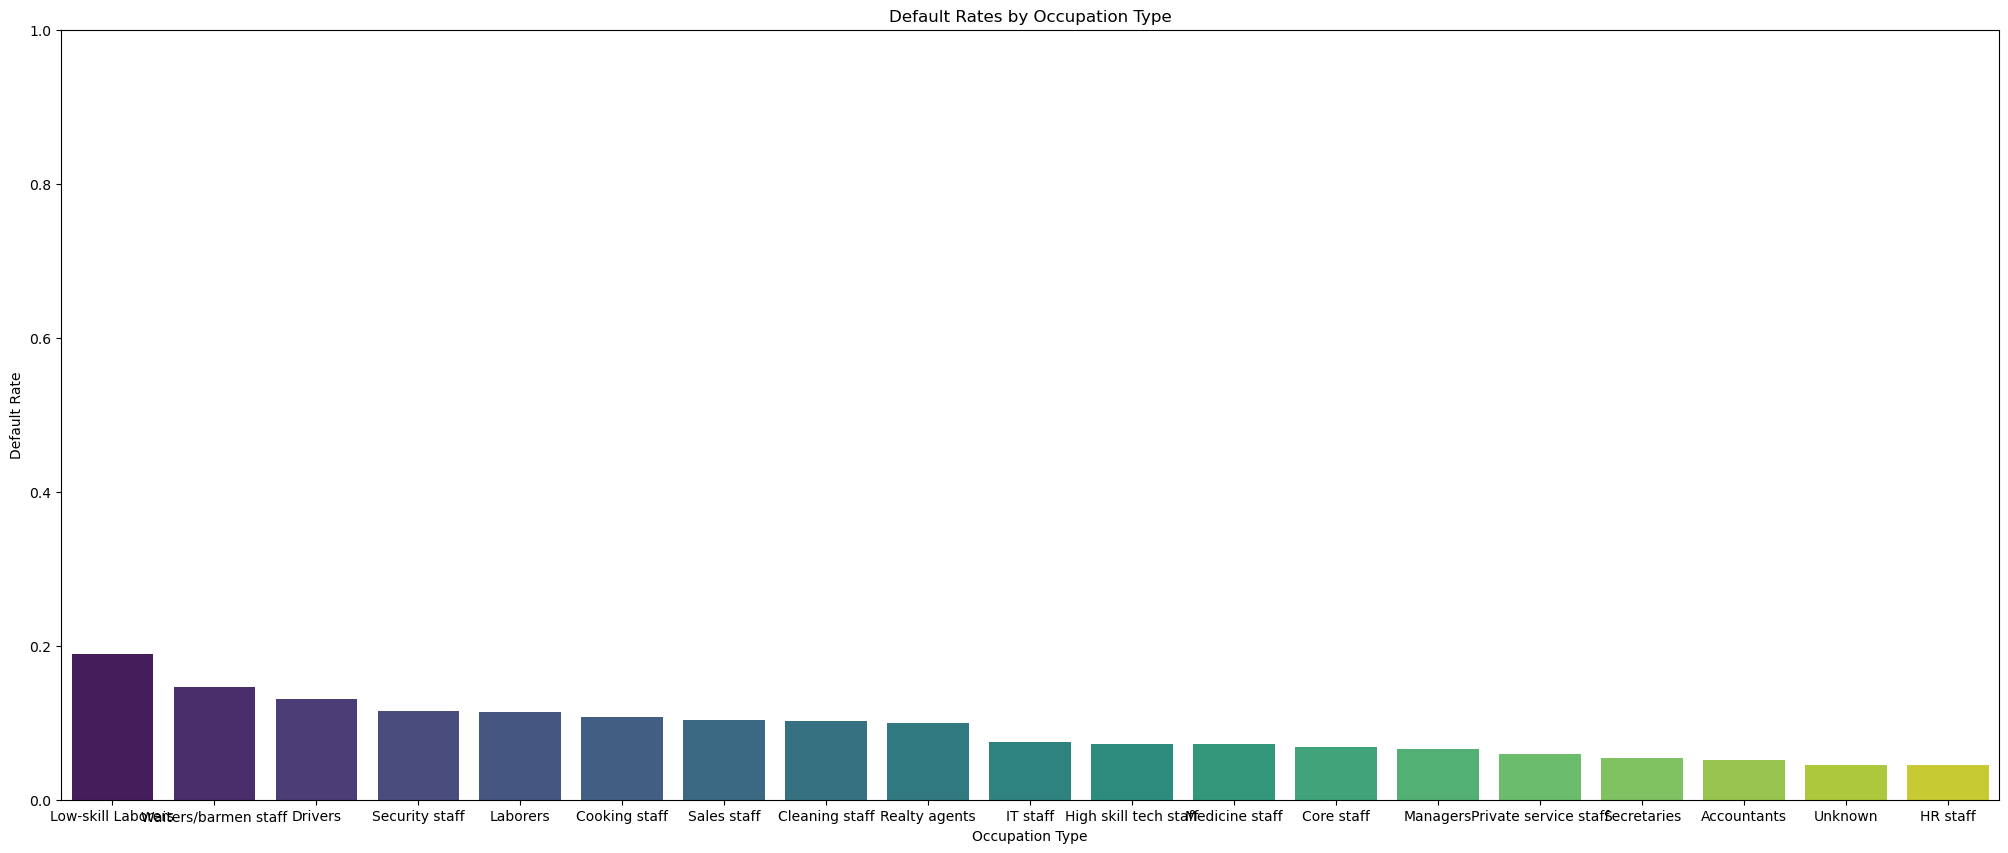

In [21]:
default_rates = df.groupby('OCCUPATION_TYPE')['TARGET'].mean().sort_values(ascending=False)
print(default_rates)
# Create a bar plot
plt.figure(figsize=(25,10))
sns.barplot(x=default_rates.index, y=default_rates.values, palette='viridis')
plt.xlabel('Occupation Type')
plt.ylabel('Default Rate')
plt.title('Default Rates by Occupation Type')
plt.ylim(0, 1)  # Set y-axis limits (0 to 1)
plt.show()

# Are there specific educational or employment patterns associated with higher default risk?

NAME_EDUCATION_TYPE
Lower secondary                  0.107404
Secondary / secondary special    0.096237
Incomplete higher                0.085620
Higher education                 0.060026
Academic degree                  0.000000
Unknown                          0.000000
Name: TARGET, dtype: float64


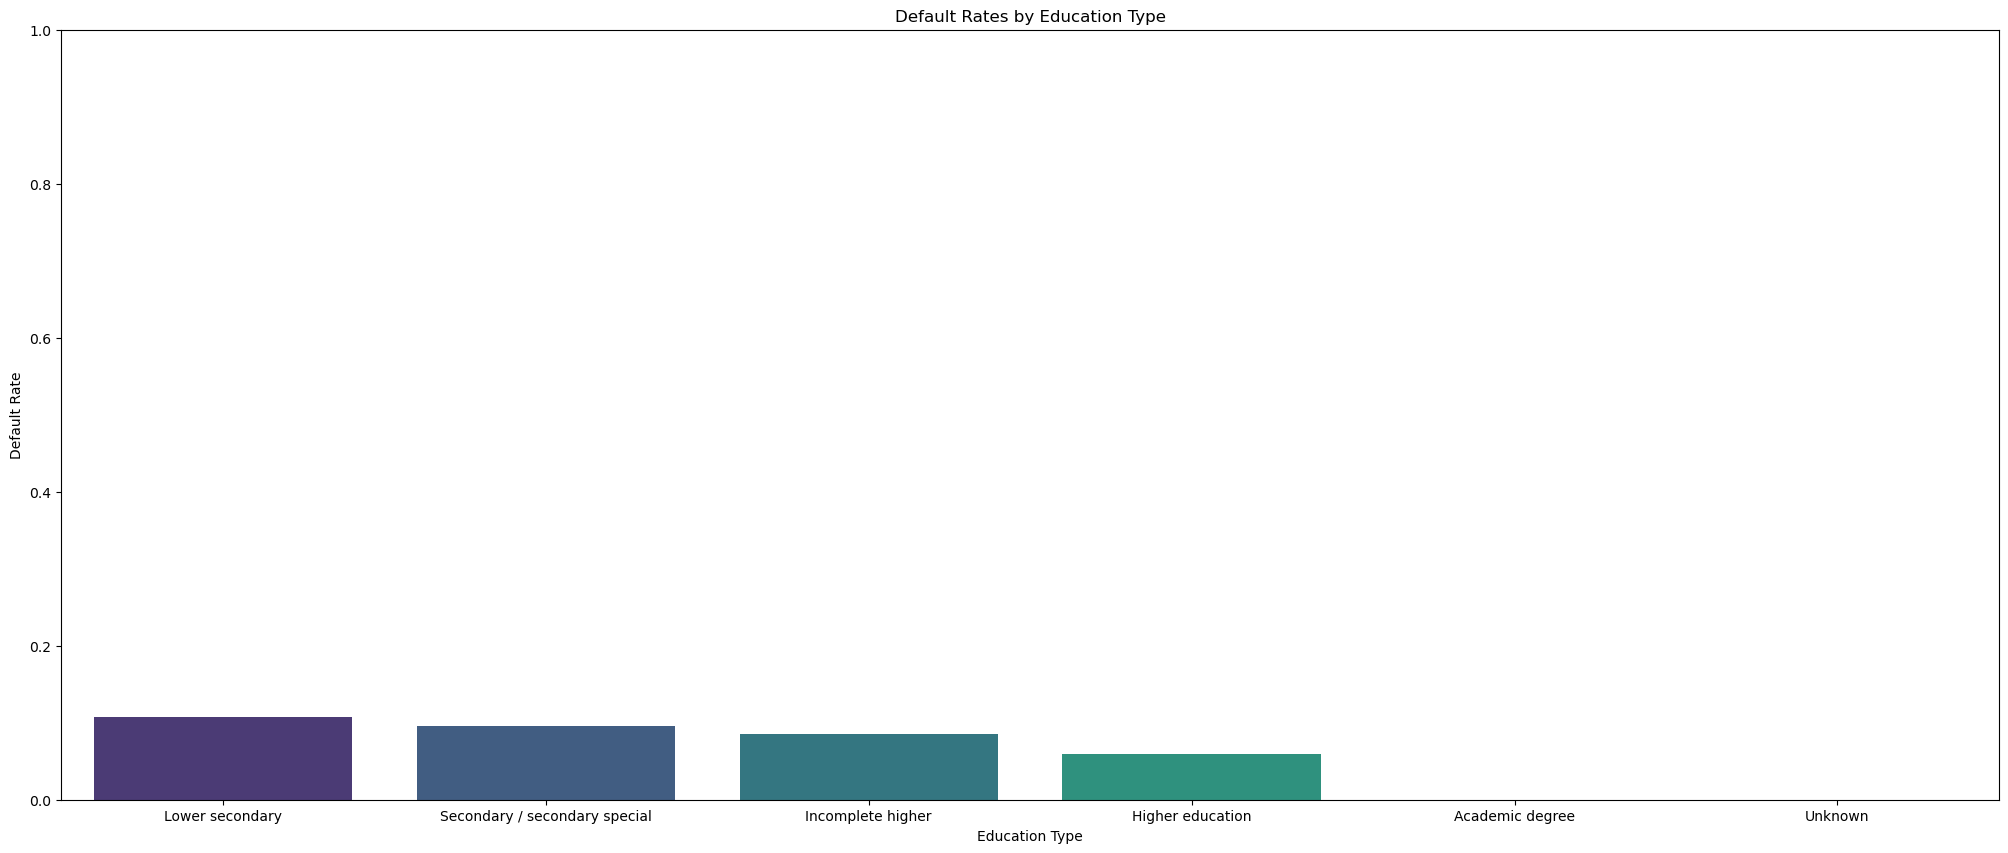

In [22]:
default_rates = df.groupby('NAME_EDUCATION_TYPE')['TARGET'].mean().sort_values(ascending=False)
print(default_rates)
# Create a bar plot
plt.figure(figsize=(25,10))
sns.barplot(x=default_rates.index, y=default_rates.values, palette='viridis')
plt.xlabel('Education Type')
plt.ylabel('Default Rate')
plt.title('Default Rates by Education Type')
plt.ylim(0, 1)  # Set y-axis limits (0 to 1)
plt.show()

NAME_INCOME_TYPE
Unemployed              0.750000
Working                 0.103413
Commercial associate    0.085435
State servant           0.060569
Pensioner               0.059035
Student                 0.000000
Unknown                 0.000000
Name: TARGET, dtype: float64


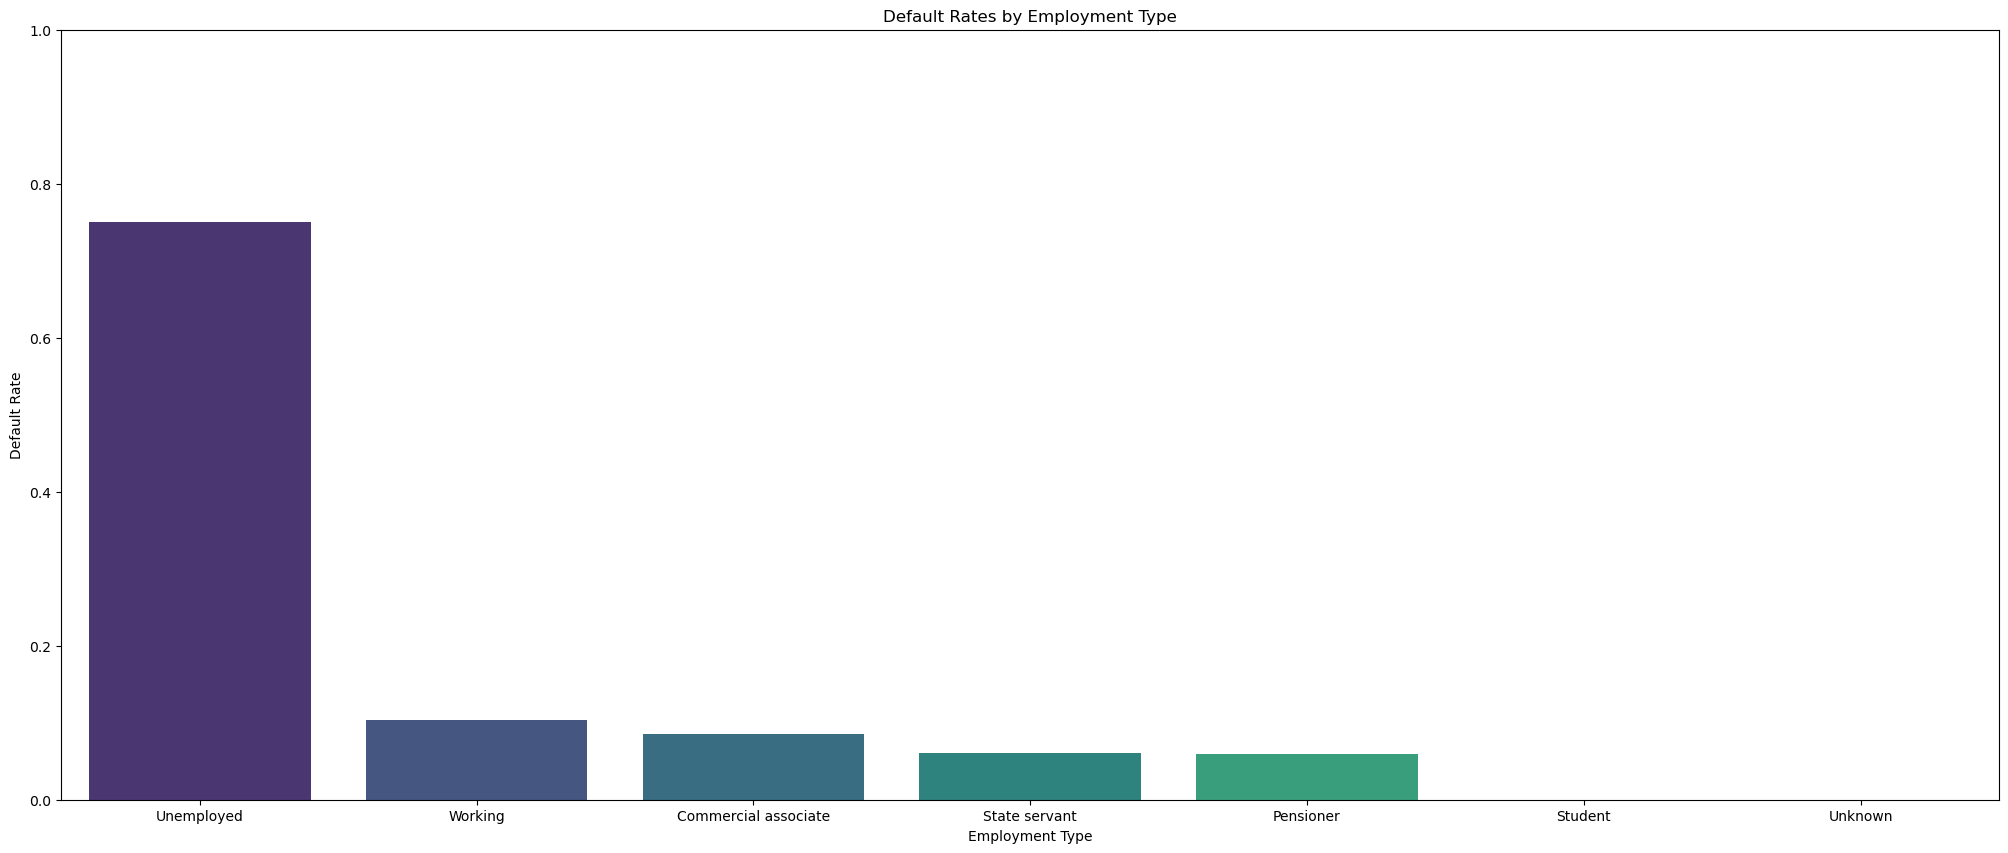

In [23]:
default_rates = df.groupby('NAME_INCOME_TYPE')['TARGET'].mean().sort_values(ascending=False)
print(default_rates)
# Create a bar plot
plt.figure(figsize=(25,10))
sns.barplot(x=default_rates.index, y=default_rates.values, palette='viridis')
plt.xlabel('Employment Type')
plt.ylabel('Default Rate')
plt.title('Default Rates by Employment Type')
plt.ylim(0, 1)  # Set y-axis limits (0 to 1)
plt.show()

# Are there differences in the client profiles between those with payment difficulties and those without?

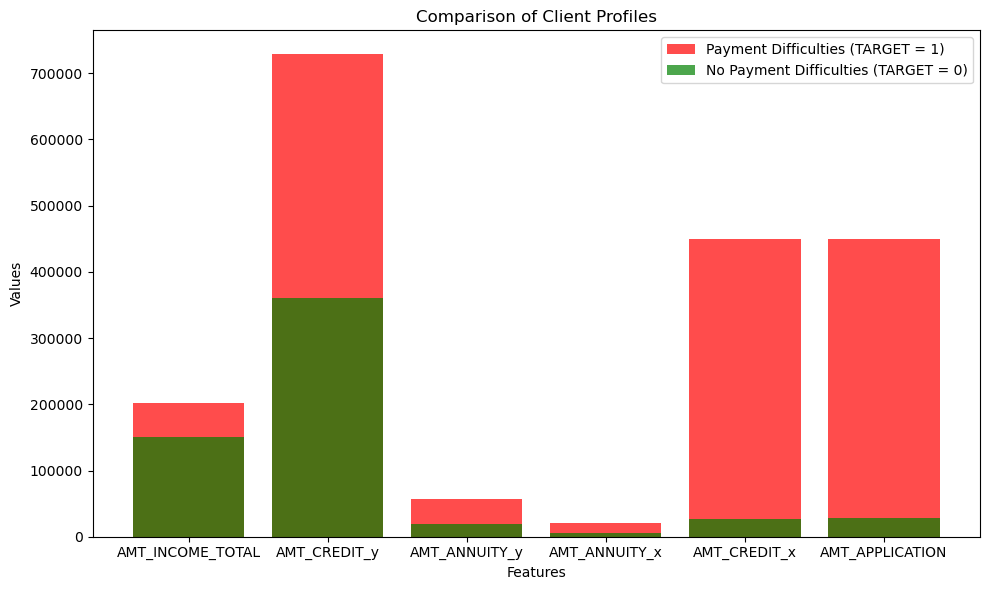

In [24]:
# Separate data for TARGET = 1 and TARGET = 0
target_1 = df[df["TARGET"] == 1]
target_0 = df[df["TARGET"] == 0]

# Features for x-axis
features = ["AMT_INCOME_TOTAL", "AMT_CREDIT_y", "AMT_ANNUITY_y","AMT_ANNUITY_x","AMT_CREDIT_x","AMT_APPLICATION"]

# Values for each feature
values_1 = target_1[features].values[0]
values_0 = target_0[features].values[0]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(features, values_1, label="Payment Difficulties (TARGET = 1)", color="r", alpha=0.7)
plt.bar(features, values_0, label="No Payment Difficulties (TARGET = 0)", color="g", alpha=0.7)

# Add labels and title
plt.xlabel("Features")
plt.ylabel("Values")
plt.title("Comparison of Client Profiles")

# Show legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

# Calculate Income to Debt ratio ?

In [25]:
df["DTI"]=(df["AMT_CREDIT_y"]*df["AMT_INCOME_TOTAL"])/100
df

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE_x,AMT_ANNUITY_x,AMT_APPLICATION,AMT_CREDIT_x,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_x,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_x,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,TARGET,NAME_CONTRACT_TYPE_y,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_y,AMT_ANNUITY_y,AMT_GOODS_PRICE_y,NAME_TYPE_SUITE_y,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DTI
876718,1327604,127360,Consumer loans,5318.100,27616.5,26082.0,2763.0,27616.5,WEDNESDAY,10,Y,1,0.104322,0.0,0.0,XAP,Approved,-1210,Cash through the bank,XAP,Unknown,New,Mobile,POS,XNA,Country-wide,384,Consumer electronics,6.0,high,POS household with interest,365243.0,-1174.0,-1024.0,-1024.0,-1017.0,0.0,0.0,Cash loans,F,N,Y,4.0,150750.0,360000.0,19660.5,360000.0,Family,Working,Incomplete higher,Separated,House / apartment,0.018029,-14432.0,-106.0,-3010.0,-3946.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,Sales staff,5.0,3.0,3.0,TUESDAY,8.0,0.0,0.0,0.0,0.0,1.0,1.0,Business Entity Type 3,0.498776,0.263144,0.385915,0.0000,0.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,Unknown,Unknown,0.0000,Unknown,Unknown,0.0,0.0,0.0,0.0,-1210.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,5.427000e+08
1463966,1830718,218834,Cash loans,19737.945,13500

Lower DTI ratio generally indicates better financial health and a reduced risk of default. Lenders often use DTI ratios to 
assess borrowers ability to manage debt. If the DTI ratio is too high, it may signal potential repayment challenges.

# Financial Analysis:

# What is the relationship between income, debt levels, and loan default probability?

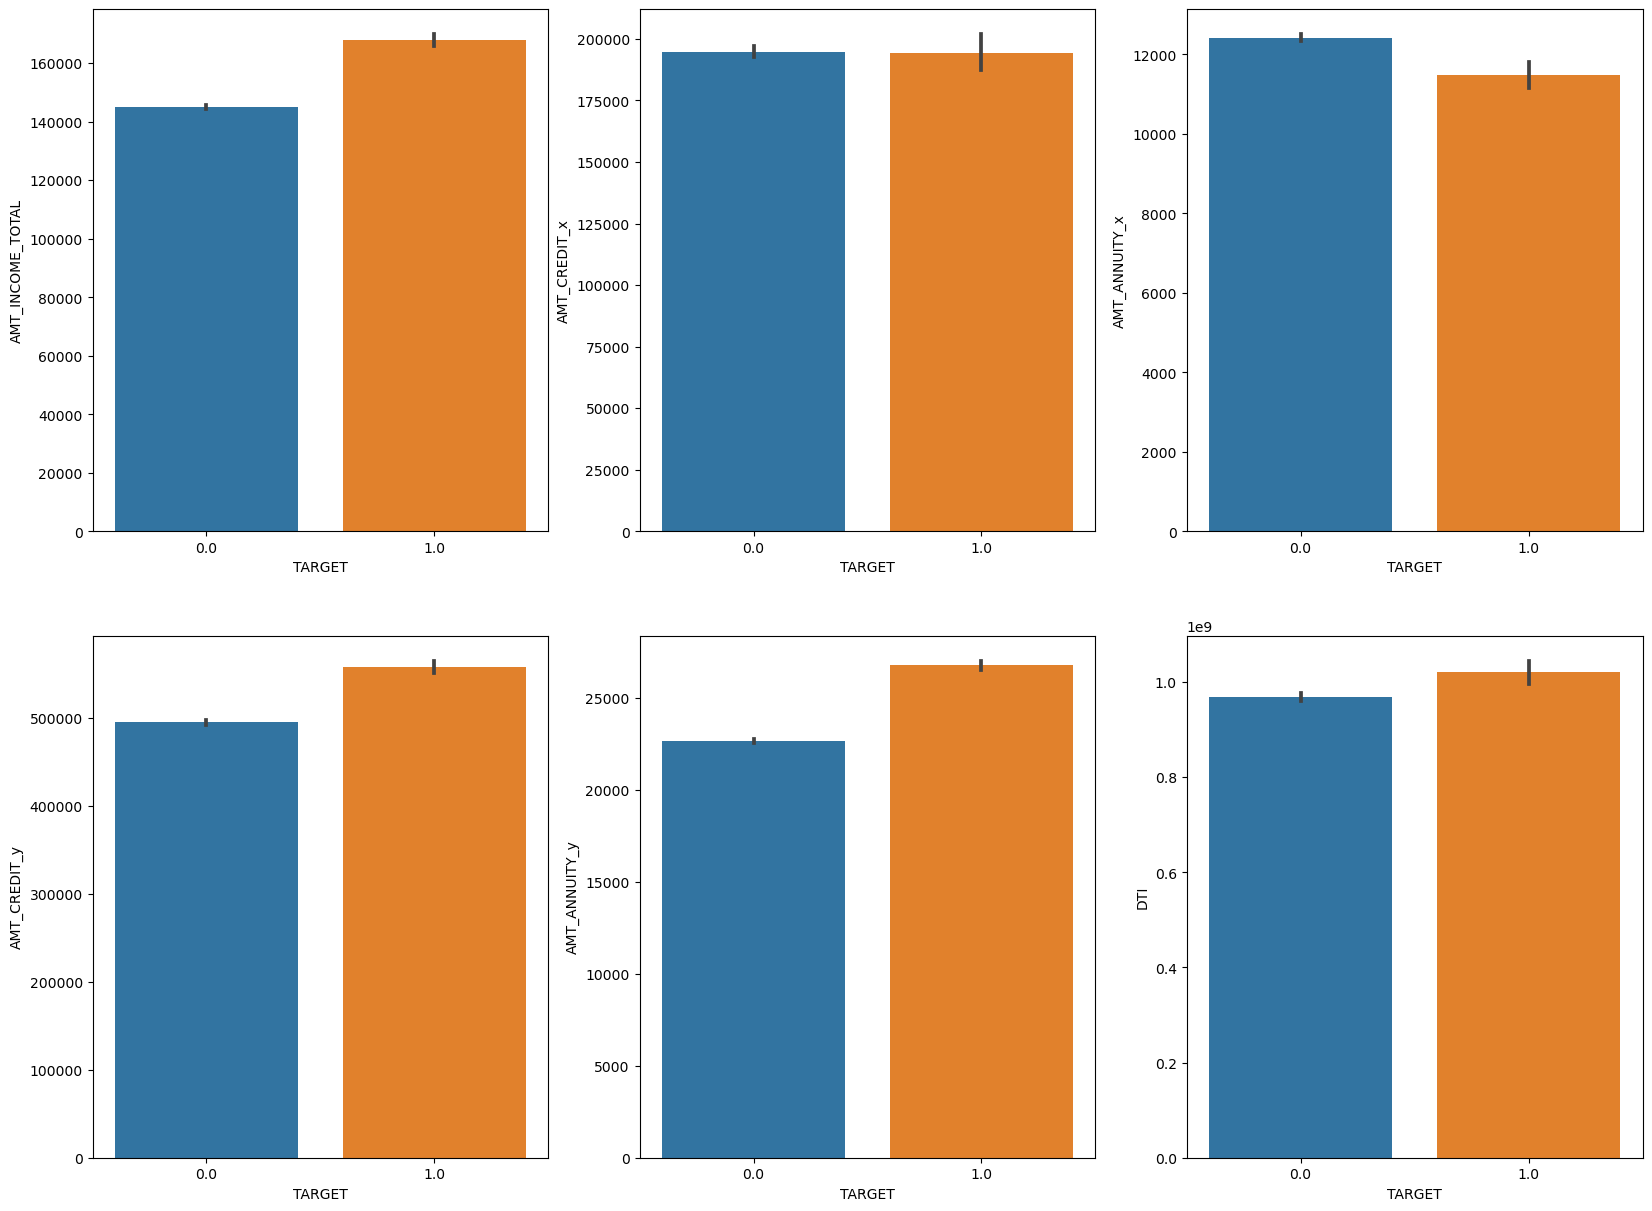

In [26]:
features = ["AMT_INCOME_TOTAL","AMT_CREDIT_x","AMT_ANNUITY_x","AMT_CREDIT_y","AMT_ANNUITY_y","DTI"]
plt.figure(figsize=(20,80))
plot=1
for i in features:
    ax=plt.subplot(10,3,plot)
    sns.barplot(x='TARGET',y=df[i],data=df)
    plt.xlabel("TARGET")
    plot+=1
    plt.show

In [ ]:
#Income and Default Probability:
Higher income generally reduces the likelihood of loan default.
Individuals with stable and higher incomes are better positioned to meet their debt obligations.

#Debt Levels and Default Probability:
AMT_CREDIT represents the loan amount extended to borrowers.
AMT_ANNUITY is the monthly payment required to repay the loan.
High debt relative to income can increase the risk of default.

#Debt-to-Income Ratio (DTI):
Calculating the DTI ratio (as shown earlier) provides insights into the relationship.
A low DTI ratio (below 36%) indicates better financial health and reduced default risk.

#Non-Linear Relationship:
Research suggests that the relationship between DTI and default probability is non-linear.
Defaults may occur at different DTI levels for consumer loans compared to mortgages
Consumer loan defaults often happen at lower DTI levels.

#Other Factors:
Macro Conditions: Unemployment rates and economic stability impact default probability.
Population Characteristics: Per capita income and employment levels play a role.


# What is the income distribution among loan applicants, and how does it influence loan amounts and approval rates?

In [27]:
df.head(2)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE_x,AMT_ANNUITY_x,AMT_APPLICATION,AMT_CREDIT_x,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_x,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_x,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,TARGET,NAME_CONTRACT_TYPE_y,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_y,AMT_ANNUITY_y,AMT_GOODS_PRICE_y,NAME_TYPE_SUITE_y,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DTI
876718,1327604,127360,Consumer loans,5318.100,27616.5,26082.0,2763.0,27616.5,WEDNESDAY,10,Y,1,0.104322,0.0,0.0,XAP,Approved,-1210,Cash through the bank,XAP,Unknown,New,Mobile,POS,XNA,Country-wide,384,Consumer electronics,6.0,high,POS household with interest,365243.0,-1174.0,-1024.0,-1024.0,-1017.0,0.0,0.0,Cash loans,F,N,Y,4.0,150750.0,360000.0,19660.5,360000.0,Family,Working,Incomplete higher,Separated,House / apartment,0.018029,-14432.0,-106.0,-3010.0,-3946.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,Sales staff,5.0,3.0,3.0,TUESDAY,8.0,0.0,0.0,0.0,0.0,1.0,1.0,Business Entity Type 3,0.498776,0.263144,0.385915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Unknown,Unknown,0.0,Unknown,Unknown,0.0,0.0,0.0,0.0,-1210.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,542700000.0
1463966,1830718,218834,Cash loans,19737.945,135000.0,165226.5,0.0,135000.0,WEDNESDAY,8,Y,1,0.000000,0.0,0.0,XNA,Approved,-1223,XNA,XAP,Unaccompanied,New

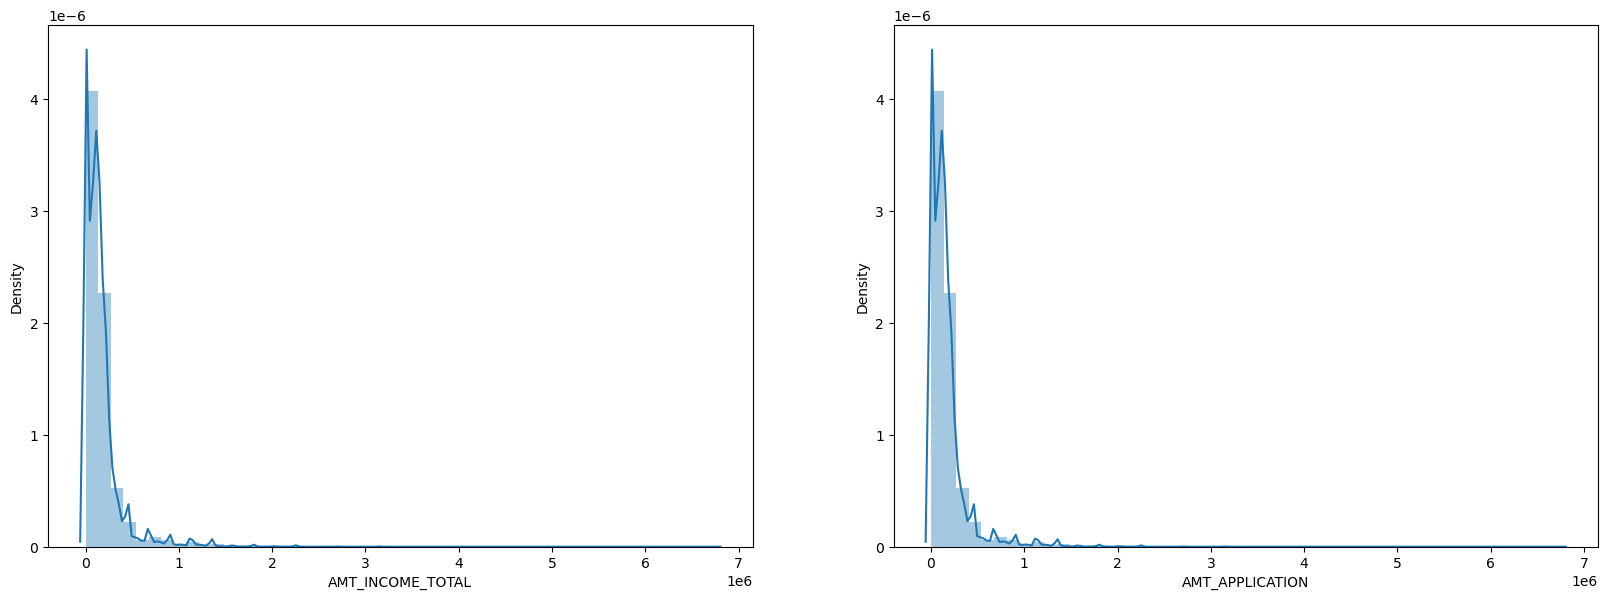

In [28]:
features = ["AMT_INCOME_TOTAL","AMT_APPLICATION"]
plt.figure(figsize=(20,80))
plot=1
for i in features:
    ax=plt.subplot(10,2,plot)
    sns.distplot(df[features])
    plt.xlabel(i)
    plot+=1
    plt.show

In [ ]:
#Fixed Obligation-to-Income Ratio (FOIR): 
It is a crucial factor in the loan approval process, especially for Personal Loans. It represents the balance between an 
individual’s existing debts and their disposable income.

#Impact on Personal Loan Approval:
Lower FOIR: Applicants with a lower FOIR have better chances of loan approval. Maintaining a reduced FOIR correlates with
higher chances of securing the desired loan amount.

Higher FOIR: A higher FOIR reduces creditworthiness and makes loan approval less likely. Managing and optimizing financial
obligations is essential to maintain a competitive FOIR.

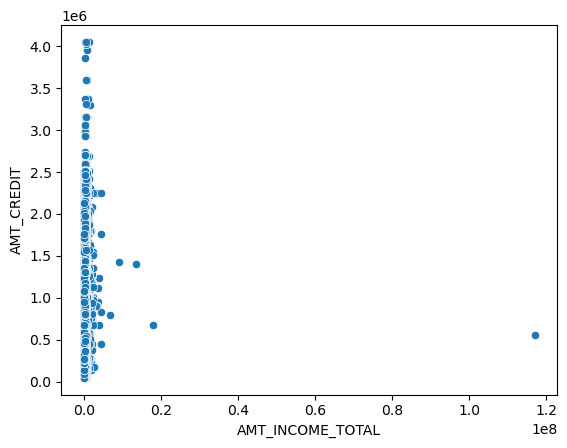

In [29]:
sns.scatterplot(x='AMT_INCOME_TOTAL',y='AMT_CREDIT',data=df2)
plt.xlabel("AMT_INCOME_TOTAL")
plt.ylabel("AMT_CREDIT")
plt.show()

# How does the loan amount requested by clients compare to their income levels, and does it impact default rates?

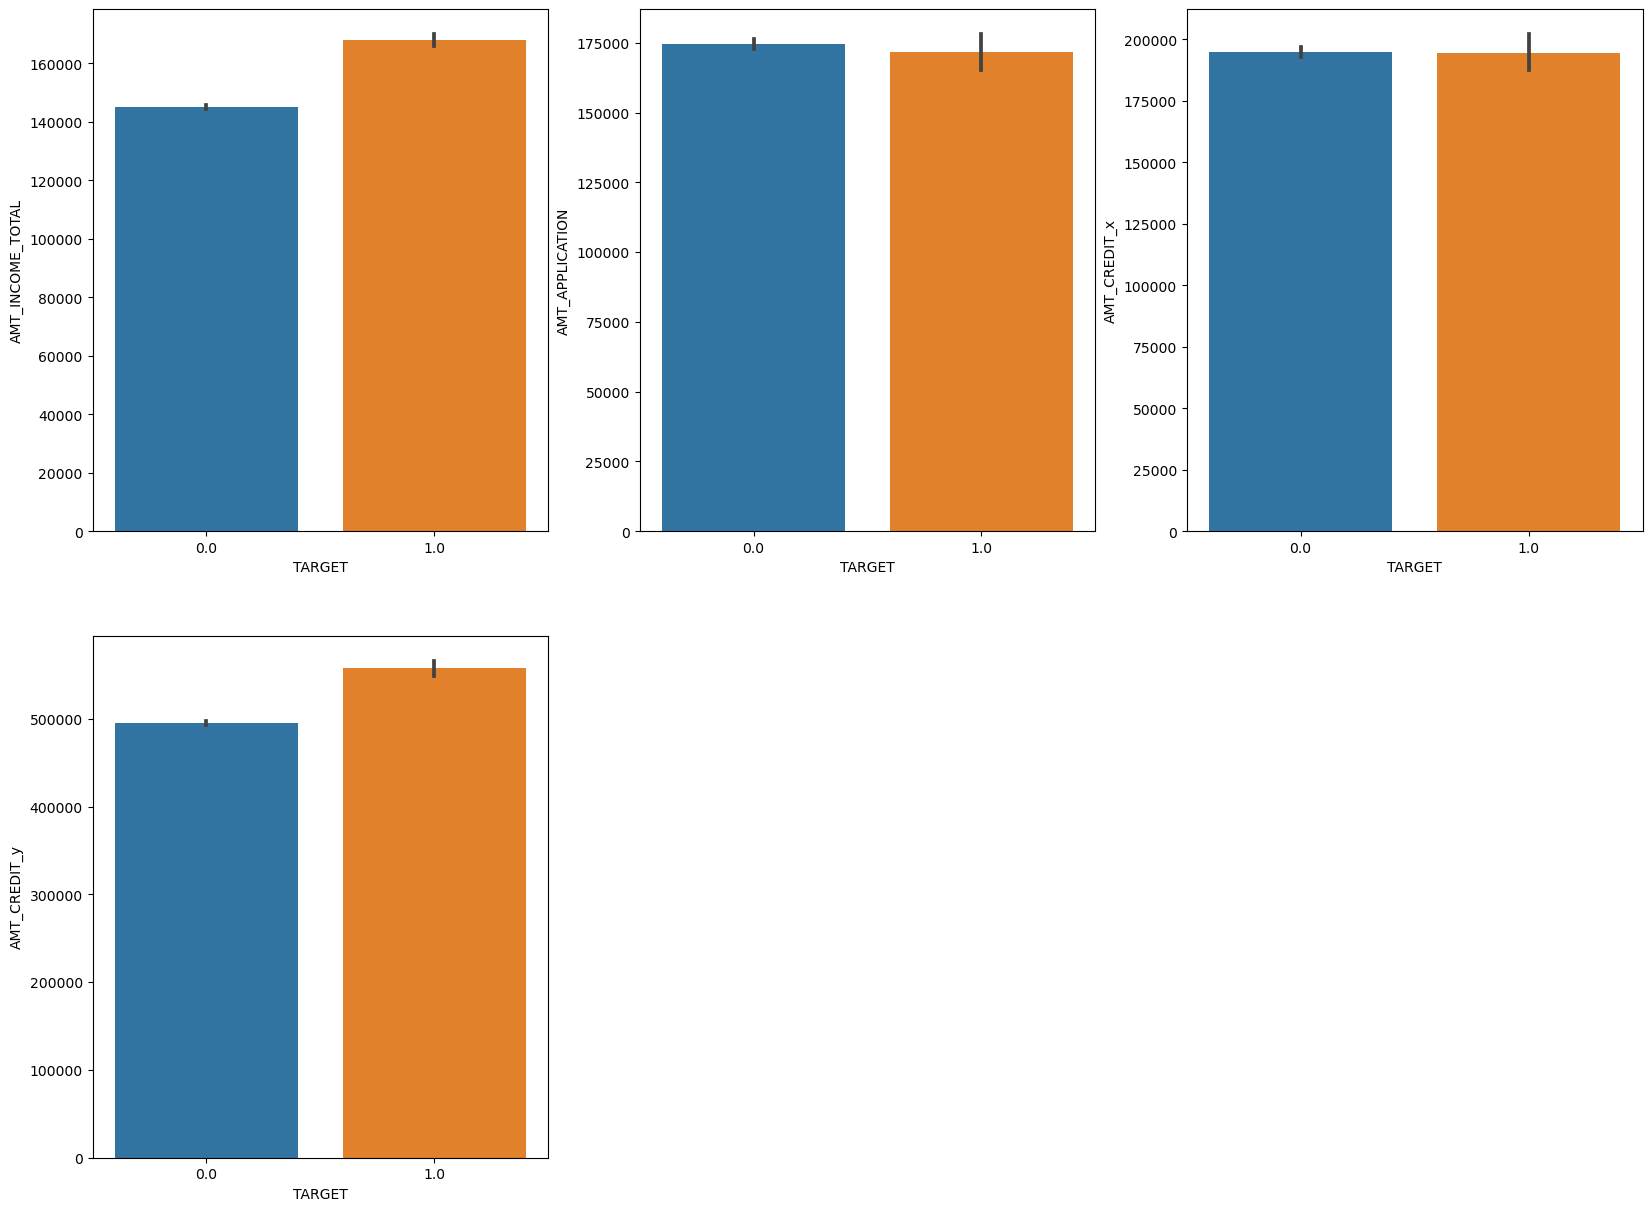

In [35]:
features = ["AMT_INCOME_TOTAL","AMT_APPLICATION","AMT_CREDIT_x","AMT_CREDIT_y"]
plt.figure(figsize=(20,80))
plot=1
for i in features:
    ax=plt.subplot(10,3,plot)
    sns.barplot(x='TARGET',y=df[i],data=df)
    plt.xlabel("TARGET")
    plot+=1
    plt.show

# Credit History Analysis:

# How do the number of inquiries to the Credit Bureau and past defaults impact the creditworthiness of clients?

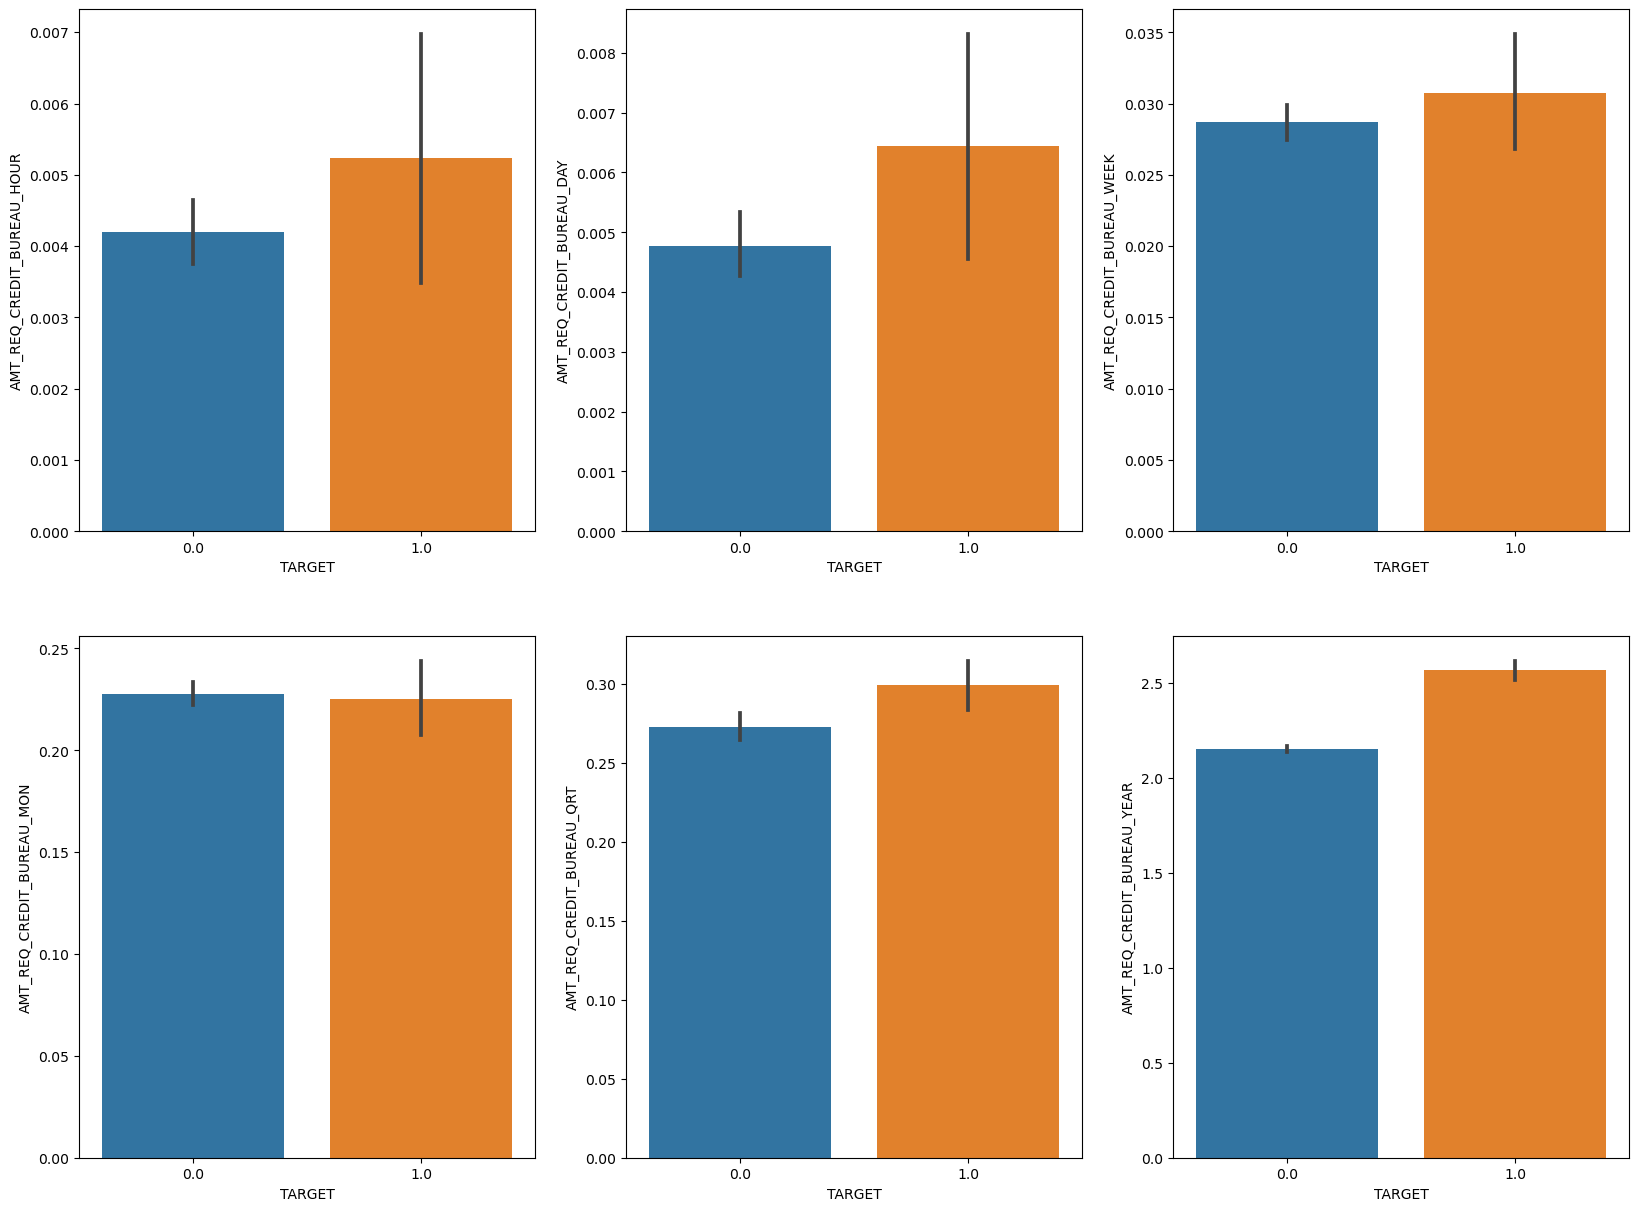

In [32]:
features = ["AMT_REQ_CREDIT_BUREAU_HOUR", "AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_YEAR"]
plt.figure(figsize=(20,80))
plot=1
for i in features:
    ax=plt.subplot(10,3,plot)
    sns.barplot(x='TARGET',y=df[i],data=df)
    plt.xlabel("TARGET")
    plot+=1
    plt.show

In [33]:
df.head(2)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE_x,AMT_ANNUITY_x,AMT_APPLICATION,AMT_CREDIT_x,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_x,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_x,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,TARGET,NAME_CONTRACT_TYPE_y,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_y,AMT_ANNUITY_y,AMT_GOODS_PRICE_y,NAME_TYPE_SUITE_y,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DTI
876718,1327604,127360,Consumer loans,5318.100,27616.5,26082.0,2763.0,27616.5,WEDNESDAY,10,Y,1,0.104322,0.0,0.0,XAP,Approved,-1210,Cash through the bank,XAP,Unknown,New,Mobile,POS,XNA,Country-wide,384,Consumer electronics,6.0,high,POS household with interest,365243.0,-1174.0,-1024.0,-1024.0,-1017.0,0.0,0.0,Cash loans,F,N,Y,4.0,150750.0,360000.0,19660.5,360000.0,Family,Working,Incomplete higher,Separated,House / apartment,0.018029,-14432.0,-106.0,-3010.0,-3946.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,Sales staff,5.0,3.0,3.0,TUESDAY,8.0,0.0,0.0,0.0,0.0,1.0,1.0,Business Entity Type 3,0.498776,0.263144,0.385915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Unknown,Unknown,0.0,Unknown,Unknown,0.0,0.0,0.0,0.0,-1210.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,542700000.0
1463966,1830718,218834,Cash loans,19737.945,135000.0,165226.5,0.0,135000.0,WEDNESDAY,8,Y,1,0.000000,0.0,0.0,XNA,Approved,-1223,XNA,XAP,Unaccompanied,New

# Are there any relationships between the client's credit risk and the reasons for rejection of their previous loan application

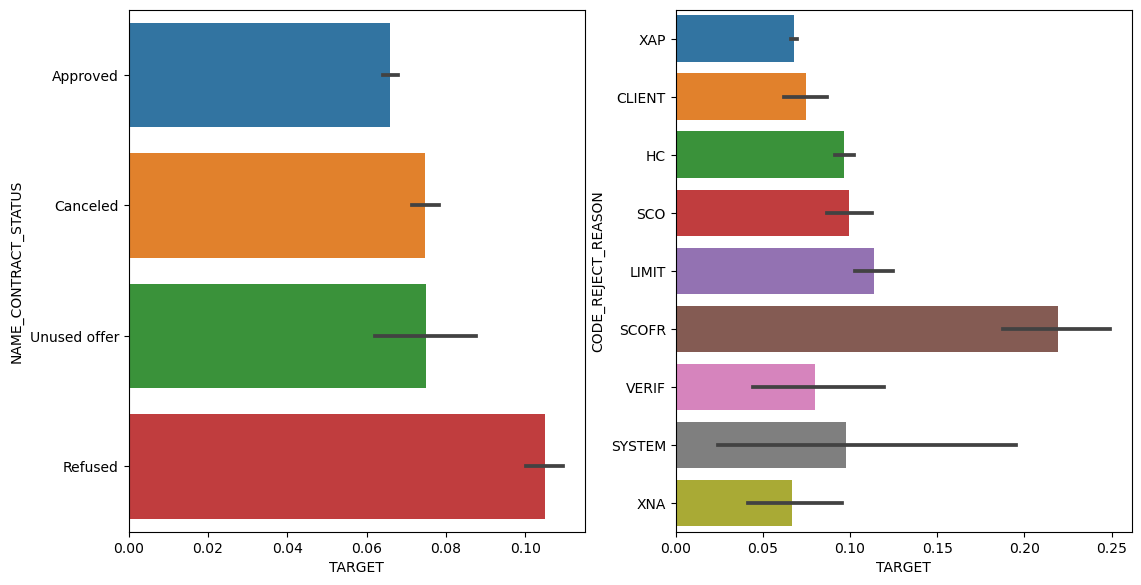

In [37]:
features = ["NAME_CONTRACT_STATUS","CODE_REJECT_REASON"]
plt.figure(figsize=(20,80))
plot=1
for i in features:
    ax=plt.subplot(10,3,plot)
    sns.barplot(x='TARGET',y=df[i],data=df)
    plt.xlabel("TARGET")
    plot+=1
    plt.show

In [ ]:
#Credit Score and Loan Rejection:
Credit Score: A credit score reflects an individual’s creditworthiness. It ranges from 300 to 900, with higher scores
indicating lower credit risk.

Loan Rejection Impact: While loan applications within the past 30 days can affect your credit score, there is no direct
correlation between loan rejection and credit score. Banks are not obligated to report the outcome of loan applications in 
credit history.

#Reasons for Loan Rejection: Various factors can lead to loan rejection, including:
Poor credit: A low credit score affects loan approval.
    
High debt-to-income ratio: Excessive debt relative to income reduces creditworthiness.
    
Lack of guarantor or co-signer: Insufficient support affects loan eligibility.
    
Invalid bank account information: Accurate details are crucial.
    
Unrealistic loan amount: Requesting an impractical sum impacts approval.
    
Insufficient financial stability: Stable finances enhance creditworthiness.
    
Age and citizenship requirements: Meeting criteria is essential12.
    
#Previous Loan Rejection and Current Loan Applications:
Impact: Rejection of previous loan applications is tracked by credit bureaus. Current lenders can access this information.
    
Result: If your previous loan was declined, it may influence your current loan application. However, the rejection itself does 
not directly affect your credit score.

Caution: Ensure timely repayments and maintain a healthy credit history to improve creditworthiness

# Is the type and length of credit history relevant to default risk assessment?

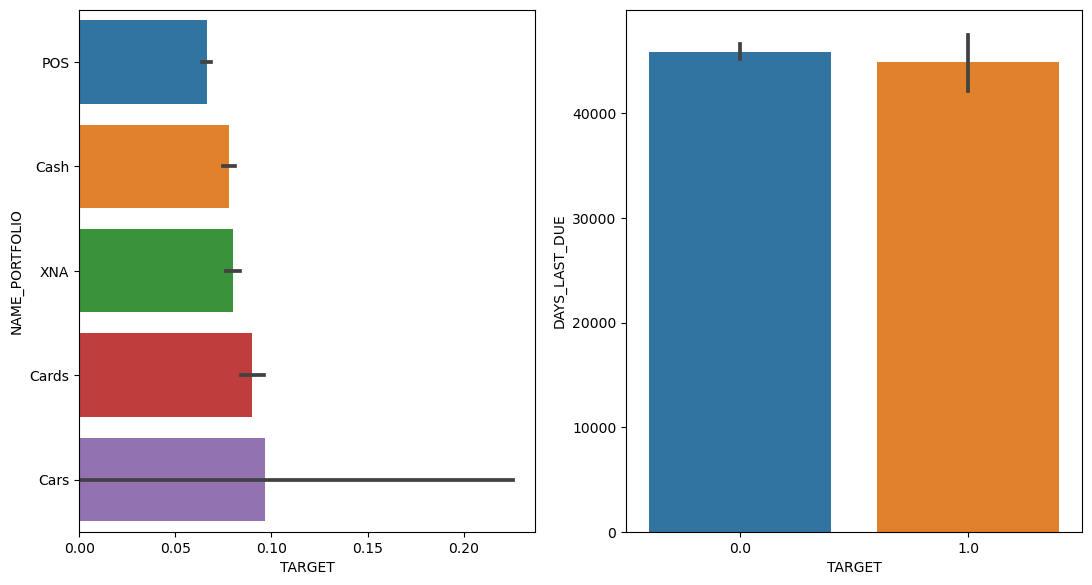

In [39]:
features =["NAME_PORTFOLIO","DAYS_LAST_DUE"]
plt.figure(figsize=(20,80))
plot=1
for i in features:
    ax=plt.subplot(10,3,plot)
    sns.barplot(x='TARGET',y=df[i],data=df)
    plt.xlabel("TARGET")
    plot+=1
    plt.show

In [ ]:
#Type of Credit History:
Revolving Credit: This includes credit cards and lines of credit. A longer history of responsible credit card usage 
demonstrates reliability.
Installment Loans: These involve fixed payments over time (e.g., auto loans, mortgages). A positive history with installment
loans boosts creditworthiness.
Mix of Credit: A diverse credit portfolio (both revolving and installment) is favorable.
New Credit: Frequent new credit applications can negatively impact credit scores.
    
#Length of Credit History:
Age of Oldest Account: A longer credit history indicates stability.
Average Account Age: Calculated by summing account ages and dividing by the number of accounts. A higher average age is 
beneficial.
New Accounts: Opening new accounts affects average age. Avoid frequent openings.
Recent Activity: Regular activity maintains a healthy credit history.
    
#Impact on Default Risk Assessment:
Positive Impact: A longer credit history with responsible behavior reduces default risk.
Negative Impact: Limited or no credit history may raise concerns.
Caution: Avoid closing old accounts, as it shortens credit history.

# Loan Application Decisions Analysis:

# Do specific loan types, amounts, or purposes correlate with higher default risk?

In [41]:
df[["AMT_INCOME_TOTAL","AMT_CREDIT_x","AMT_ANNUITY_x","AMT_GOODS_PRICE_x","AMT_APPLICATION","AMT_CREDIT_y","AMT_ANNUITY_y","AMT_GOODS_PRICE_x","TARGET"]].corr()

,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,AMT_APPLICATION,AMT_CREDIT_y,AMT_ANNUITY_y,AMT_GOODS_PRICE_x,TARGET
AMT_INCOME_TOTAL,1.000000,0.106493,0.129574,0.107094,0.107074,0.530792,0.619263,0.107094,0.055273
AMT_CREDIT_x,0.106493,1.000000,0.834078,0.976742,0.976717,0.093731,0.081739,0.976742,-0.000393
AMT_ANNUITY_x,0.129574,0.834078,1.000000,0.826044,0.826014,0.104246,0.121825,0.826044,-0.017234
AMT_GOODS_PRICE_x,0.107094,0.976742,0.826044,1.000000,0.999969,0.095324,0.084455,1.000000,-0.002599
AMT_APPLICATION,0.107074,0.976717,0.826014,0.999969,1.000000,0.095282,0.084439,0.999969,-0.002591
AMT_CREDIT_y,0.530792,0.093731,0.104246,0.095324,0.095282,1.000000,0.828688,0.095324,0.040051
AMT_ANNUITY_y,0.619263,0.081739,0.121825,0.084455,0.084439,0.828688,1.000000,0.084455,0.066883
AMT_GOODS_PRICE_x,0.107094,0.976742,0.826044,1.000000,0.999969,0.095324,0.084455,1.000000,-0.002599
TARGET,0.055273,-0.000393,-0.017234,-0.002599,-0.002591,0.040051,0.066883,-0.002599,1.000000


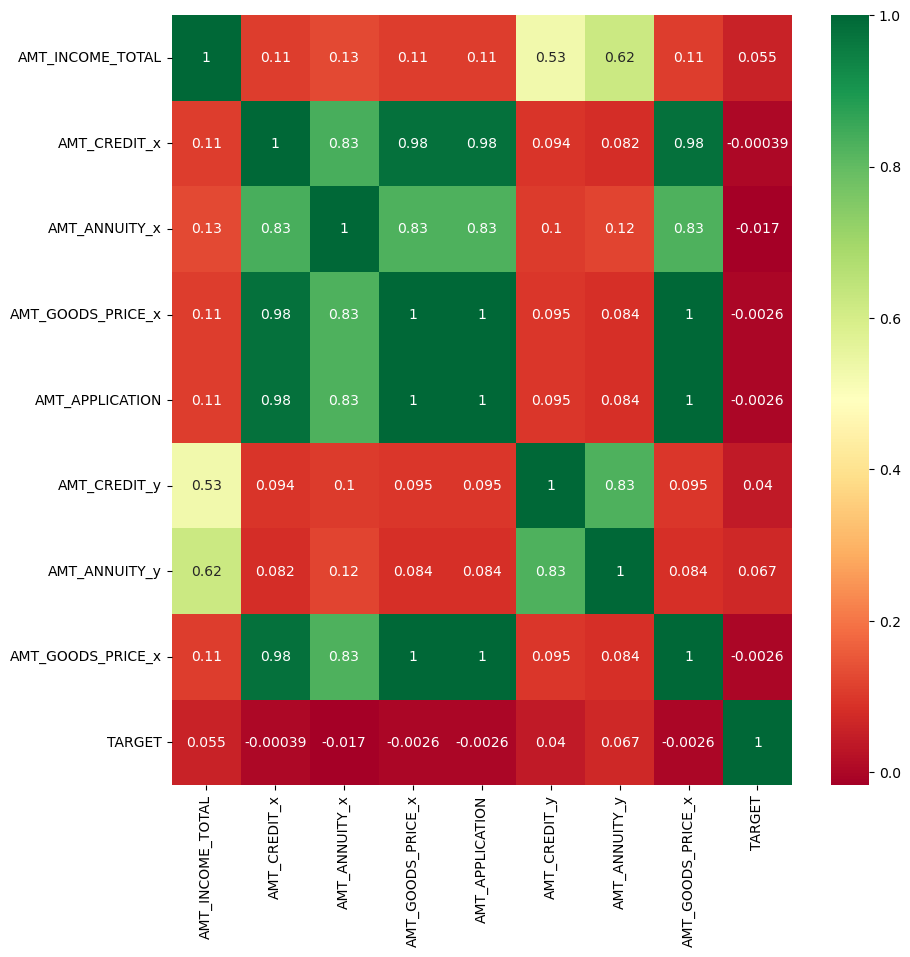

In [44]:
corrmat =df[["AMT_INCOME_TOTAL","AMT_CREDIT_x","AMT_ANNUITY_x","AMT_GOODS_PRICE_x","AMT_APPLICATION","AMT_CREDIT_y","AMT_ANNUITY_y","AMT_GOODS_PRICE_x","TARGET"]].corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
TARGET variable has a negligible correlation with other features.

The target variable represents whether a loan applicant defaulted (1) or not (0).

# Is there a difference in approval rates between different types of loans (cash vs. revolving)?

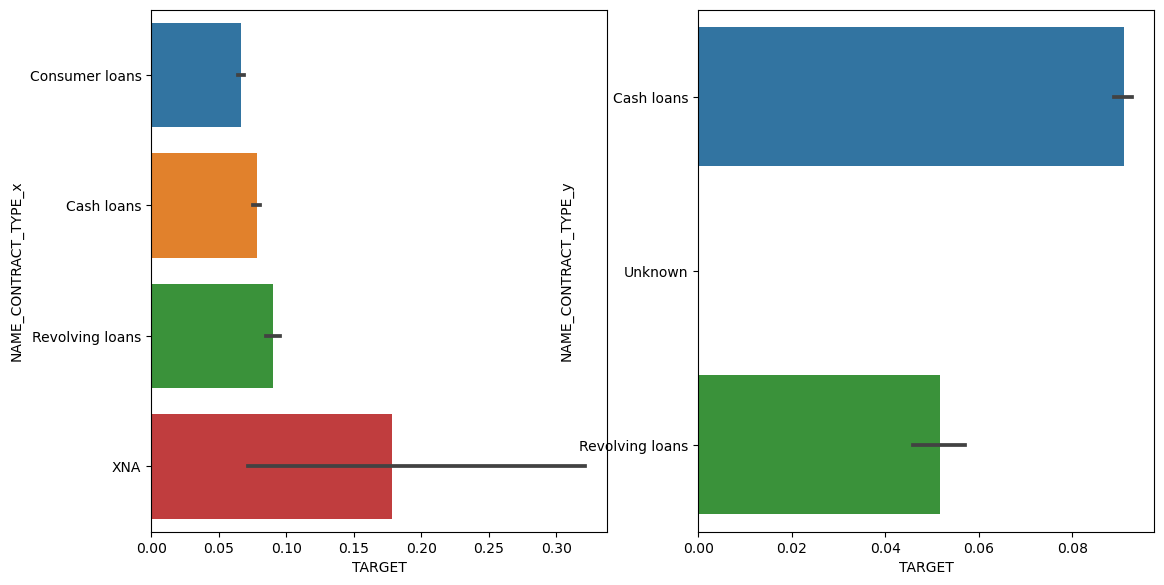

In [38]:
features =["NAME_CONTRACT_TYPE_x","NAME_CONTRACT_TYPE_y"]
plt.figure(figsize=(20,80))
plot=1
for i in features:
    ax=plt.subplot(10,3,plot)
    sns.barplot(x='TARGET',y=df[i],data=df)
    plt.xlabel("TARGET")
    plot+=1
    plt.show

# How do previous application outcomes (approval, refusal) affect future default risk?

In [49]:
df.head(2)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE_x,AMT_ANNUITY_x,AMT_APPLICATION,AMT_CREDIT_x,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_x,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_x,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,TARGET,NAME_CONTRACT_TYPE_y,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_y,AMT_ANNUITY_y,AMT_GOODS_PRICE_y,NAME_TYPE_SUITE_y,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DTI
876718,1327604,127360,Consumer loans,5318.100,27616.5,26082.0,2763.0,27616.5,WEDNESDAY,10,Y,1,0.104322,0.0,0.0,XAP,Approved,-1210,Cash through the bank,XAP,Unknown,New,Mobile,POS,XNA,Country-wide,384,Consumer electronics,6.0,high,POS household with interest,365243.0,-1174.0,-1024.0,-1024.0,-1017.0,0.0,0.0,Cash loans,F,N,Y,4.0,150750.0,360000.0,19660.5,360000.0,Family,Working,Incomplete higher,Separated,House / apartment,0.018029,-14432.0,-106.0,-3010.0,-3946.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,Sales staff,5.0,3.0,3.0,TUESDAY,8.0,0.0,0.0,0.0,0.0,1.0,1.0,Business Entity Type 3,0.498776,0.263144,0.385915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Unknown,Unknown,0.0,Unknown,Unknown,0.0,0.0,0.0,0.0,-1210.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,542700000.0
1463966,1830718,218834,Cash loans,19737.945,135000.0,165226.5,0.0,135000.0,WEDNESDAY,8,Y,1,0.000000,0.0,0.0,XNA,Approved,-1223,XNA,XAP,Unaccompanied,New

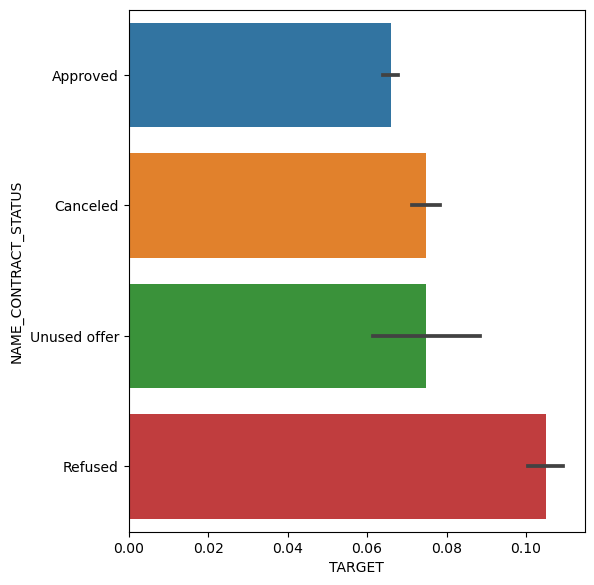

In [40]:
features =["NAME_CONTRACT_STATUS"]
plt.figure(figsize=(20,80))
plot=1
for i in features:
    ax=plt.subplot(10,3,plot)
    sns.barplot(x='TARGET',y=df[i],data=df)
    plt.xlabel("TARGET")
    plot+=1
    plt.show

# Are there any correlations between the client's credit risk and the weekday or hour they applied for the loan?

In [32]:
df[["WEEKDAY_APPR_PROCESS_START_x","HOUR_APPR_PROCESS_START_x","WEEKDAY_APPR_PROCESS_START_y","HOUR_APPR_PROCESS_START_y","TARGET"]].corr()

,HOUR_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_y,TARGET
HOUR_APPR_PROCESS_START_x,1.000000,0.199073,-0.031822
HOUR_APPR_PROCESS_START_y,0.199073,1.000000,0.085932
TARGET,-0.031822,0.085932,1.000000


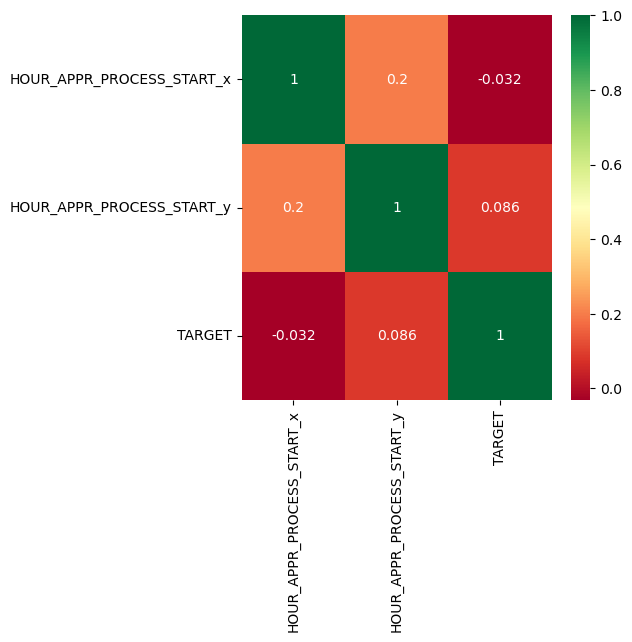

In [34]:
corrmat =df[["WEEKDAY_APPR_PROCESS_START_x","HOUR_APPR_PROCESS_START_x","WEEKDAY_APPR_PROCESS_START_y","HOUR_APPR_PROCESS_START_y","TARGET"]].corr()
top_corr_features = corrmat.index
plt.figure(figsize=(5,5))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# Portfolio and Risk Assessment:

# How can we segment the client base based on risk profiles?

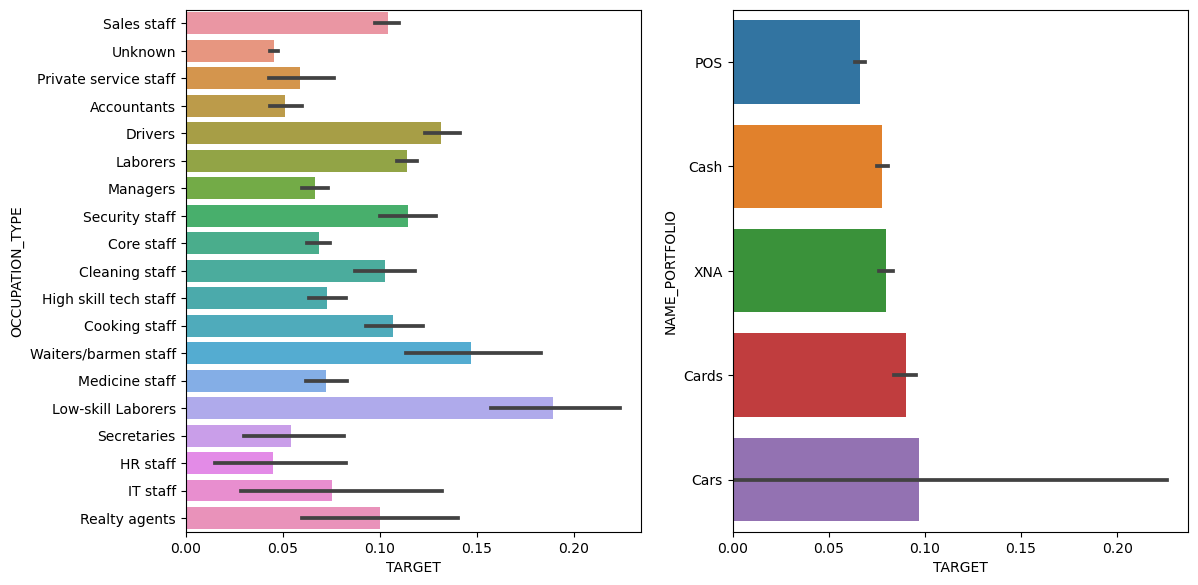

In [41]:
features =["OCCUPATION_TYPE","NAME_PORTFOLIO"]
plt.figure(figsize=(20,80))
plot=1
for i in features:
    ax=plt.subplot(10,3,plot)
    sns.barplot(x='TARGET',y=df[i],data=df)
    plt.xlabel("TARGET")
    plot+=1
    plt.show

Customer segmentation involves dividing customers into groups based on specific characteristics such as 
demographics, behavior, or preferences.
While segmentation is commonly associated with marketing efforts, it also plays a critical role in risk management.
By identifying high-risk customers, businesses can take proactive measures to minimize potential losses and enhance
profitability.
Prioritizing risk management efforts based on customer segments ensures efficient resource allocation.

# What strategies can be implemented to mitigate risks for different borrower groups?

In [ ]:
#Stringent Underwriting:
Implement robust underwriting standards.
Thoroughly assess borrowers’ creditworthiness.
This reduces the chances of lending to high-risk individuals.

#Loan Diversification:
Balance the mortgage portfolio by including a mix of low-risk and moderate-risk loans.
Diversification helps mitigate overall credit risk.

#Risk-Based Pricing (for commercial lending):
Tailor interest rates based on the borrower’s risk profile.
Higher-risk borrowers may face higher rates, incentivizing prudent borrowing behavior.

#Loan Covenants:
Include specific conditions in loan agreements.
These conditions help manage risk by ensuring borrowers meet certain financial and operational requirements.

#Market and Customer Data Analysis:
Maintain a comprehensive view of customer and market data throughout the loan lifecycle.
Regularly monitor borrower performance and adapt strategies as needed.

# Can we identify segments of clients with higher default risk based on their portfolio characteristics?

In [ ]:
#Demographics: 
Age, income, location, and other demographic factors influence risk.
    
#Behavioral: 
Customer behavior (e.g., payment history, spending patterns) affects risk.
    
#Psychographic: 
Personality, values, and lifestyle impact risk (risk-seeking behavior, for instance).
    
#RFM Segmentation: 
Recency, frequency, and monetary value of purchases provide insights into risk.

# How do macroeconomic factors impact the overall risk profile of the loan portfolio?

In [ ]:
#Economic Growth: 
When the economy is thriving, borrowers are more likely to repay their loans. Conversely,during economic downturns,
loan defaults tend to increase due to job losses and reduced income.

#Interest Rates: 
Fluctuations in interest rates impact borrowers’ ability to service their debt. Rising rates can strain borrowers,
leading to higher default rates.

#Inflation: 
High inflation erodes the purchasing power of money. Borrowers may struggle to repay loans if their income doesn’t
keep pace with inflation.

#Stock Market Performance: 
A robust stock market often correlates with economic prosperity. Positive stock market conditions can boost borrowers’ 
financial stability, while market downturns may increase loan defaults.

#Foreign Exchange Market: 
Exchange rate fluctuations affect borrowers with foreign currency-denominated loans. Currency depreciation can make 
repayments more expensive for borrowers.

#Institutional Environment: 
Regulatory changes, legal frameworks, and government policies impact lending practices. A stable and supportive
institutional environment fosters better risk management.

#Credit Market Conditions: 
Tight credit markets limit borrowers’ access to funds, potentially affecting loan repayment capacity.

#Bond Market 
Factors:
Bond yields and credit spreads influence borrowing costs. Higher yields may strain borrowers, affecting loan performance.

# Are there any trends or patterns in the default rates over time,and how do they affect the risk assessment?

In [ ]:
#Historical Analysis:
By examining past default events, lenders can identify patterns and trends that help them assess the likelihood of future
defaults.This analysis involves considering various factors, such as borrower characteristics, loan terms, economic conditions,
and industry-specific variables.

#Economic Environment:
Higher default rates are often reflective of an economic downturn. During challenging economic times, both individuals and
businesses may struggle to meet their financial obligations.Lending policies and interest rates significantly impact the 
default rate. Stricter criteria typically lead to lower rates.

#Risk Assessment:
Default models, which are statistical tools, predict the likelihood of default or non-payment by borrowers.
These models are essential in various industries, including banking and finance, as they help institutions assess the 
creditworthiness of individuals and businesses3.

# Feature Importance Analysis:

# Which factors have the strongest predictive power for loan default?

In [32]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Model Building

In [201]:
x=df_dummies1[["AMT_CREDIT_y","DAYS_FIRST_DRAWING","AMT_GOODS_PRICE_y","AMT_INCOME_TOTAL","DAYS_EMPLOYED","AMT_ANNUITY_y","DAYS_FIRST_DUE","AMT_DOWN_PAYMENT","AMT_ANNUITY_x","DAYS_TERMINATION","DAYS_LAST_DUE_1ST_VERSION","AMT_GOODS_PRICE_x","AMT_APPLICATION","DAYS_LAST_DUE","SK_ID_PREV","SELLERPLACE_AREA","AMT_CREDIT_x","HOUR_APPR_PROCESS_START_y","NAME_CONTRACT_TYPE_y_Unknown","CODE_GENDER_Unknown"]]
y=df_dummies1["TARGET"]

In [31]:
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report,roc_curve,roc_auc_score

In [207]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [3]:
import pandas as pd
df=pd.read_csv(r"C:\Users\SKAN\Desktop\Raajee\fin_risk_new_data1.csv")

In [4]:
df

,Unnamed: 0,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE_x,AMT_ANNUITY_x,AMT_APPLICATION,AMT_CREDIT_x,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_x,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_x,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,TARGET,NAME_CONTRACT_TYPE_y,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_y,AMT_ANNUITY_y,AMT_GOODS_PRICE_y,NAME_TYPE_SUITE_y,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,876718,1327604,127360,Consumer loans,5318.100,27616.5,26082.0,2763.0,27616.5,WEDNESDAY,10,Y,1,0.104322,0.0,0.0,XAP,Approved,-1210,Cash through the bank,XAP,Unknown,New,Mobile,POS,XNA,Country-wide,384,Consumer electronics,6.0,high,POS household with interest,365243.0,-1174.0,-1024.0,-1024.0,-1017.0,0.0,0.0,Cash loans,F,N,Y,4.0,150750.0,360000.0,19660.5,360000.0,Family,Working,Incomplete higher,Separated,House / apartment,0.018029,-14432.0,-106.0,-3010.0,-3946.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,Sales staff,5.0,3.0,3.0,TUESDAY,8.0,0.0,0.0,0.0,0.0,1.0,1.0,Business Entity Type 3,0.498776,0.263144,0.385915,0.0000,0.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,Unknown,Unknown,0.0000,Unknown,Unknown,0.0,0.0,0.0,0.0,-1210.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0
1,1463966,1830718,218834,Cash loans,19737.945,135000.

In [9]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [10]:
df

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE_x,AMT_ANNUITY_x,AMT_APPLICATION,AMT_CREDIT_x,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_x,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_x,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,TARGET,NAME_CONTRACT_TYPE_y,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_y,AMT_ANNUITY_y,AMT_GOODS_PRICE_y,NAME_TYPE_SUITE_y,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1327604,127360,Consumer loans,5318.100,27616.5,26082.0,2763.0,27616.5,WEDNESDAY,10,Y,1,0.104322,0.0,0.0,XAP,Approved,-1210,Cash through the bank,XAP,Unknown,New,Mobile,POS,XNA,Country-wide,384,Consumer electronics,6.0,high,POS household with interest,365243.0,-1174.0,-1024.0,-1024.0,-1017.0,0.0,0.0,Cash loans,F,N,Y,4.0,150750.0,360000.0,19660.5,360000.0,Family,Working,Incomplete higher,Separated,House / apartment,0.018029,-14432.0,-106.0,-3010.0,-3946.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,Sales staff,5.0,3.0,3.0,TUESDAY,8.0,0.0,0.0,0.0,0.0,1.0,1.0,Business Entity Type 3,0.498776,0.263144,0.385915,0.0000,0.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,Unknown,Unknown,0.0000,Unknown,Unknown,0.0,0.0,0.0,0.0,-1210.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0
1,1830718,218834,Cash loans,19737.945,135000.0,165226.5,0.0,135000.0,WE

In [11]:
df["NAME_CONTRACT_TYPE_x"]=df["NAME_CONTRACT_TYPE_x"].map({'Cash loans':0,"Revolving loans":1,"Consumer loans":2,"XNA":3})
df["NAME_CONTRACT_TYPE_y"]=df["NAME_CONTRACT_TYPE_y"].map({'Cash loans':0,"Revolving loans":1,"Unknown":2})
df["WEEKDAY_APPR_PROCESS_START_x"]=df["WEEKDAY_APPR_PROCESS_START_x"].map({'SUNDAY':0,"MONDAY":1,"TUESDAY":2,"WEDNESDAY":3,"THURSDAY":4,"FRIDAY":5,"SATURDAY":6})
df["WEEKDAY_APPR_PROCESS_START_y"]=df["WEEKDAY_APPR_PROCESS_START_y"].map({'SUNDAY':0,"MONDAY":1,"TUESDAY":2,"WEDNESDAY":3,"THURSDAY":4,"FRIDAY":5,"SATURDAY":6,"Unknown":7})
df["NAME_TYPE_SUITE_x"]=df["NAME_TYPE_SUITE_x"].map({'Unaccompanied':0,"Family":1,"Spouse, partner":2,"Children":3,"Other_A":4,"Unknown":5,"Other_B":6,"Group of people":7})
df["NAME_TYPE_SUITE_y"]=df["NAME_TYPE_SUITE_y"].map({'Unaccompanied':0,"Family":1,"Spouse, partner":2,"Children":3,"Other_A":4,"Unknown":5,"Other_B":6,"Group of people":7})

In [12]:
df["FLAG_OWN_CAR"]=df["FLAG_OWN_CAR"].map({'N':0,"Y":1,"Unknown":2})
df["FLAG_OWN_REALTY"]=df["FLAG_OWN_REALTY"].map({'N':0,"Y":1,"Unknown":2})

In [13]:
df["FLAG_LAST_APPL_PER_CONTRACT"]=df["FLAG_LAST_APPL_PER_CONTRACT"].map({'N':0,"Y":1})

In [14]:
df["NAME_CONTRACT_STATUS"]=df["NAME_CONTRACT_STATUS"].map({'Canceled':0,"Approved":1,"Unused offer":2,"Refused":3})
df["NAME_PAYMENT_TYPE"]=df["NAME_PAYMENT_TYPE"].map({'Non-cash from your account':0,"Cash through the bank":1,"Cashless from the account of the employer":2,"XNA":3})
df["CODE_REJECT_REASON"]=df["CODE_REJECT_REASON"].map({'CLIENT':0,"HC":1,"SCO":2,"LIMIT":3,"SCOFR":4,"VERIF":5,"SYSTEM":6,"XAP":7,"XNA":8})
df["NAME_CLIENT_TYPE"]=df["NAME_CLIENT_TYPE"].map({'New':0,"Repeater":1,"Refreshed":2,"XNA":3})
df["NAME_PORTFOLIO"]=df["NAME_PORTFOLIO"].map({'POS':0,"Cash":1,"Cards":2,"Cars":3,"XNA":4})


In [15]:
df["NAME_PRODUCT_TYPE"]=df["NAME_PRODUCT_TYPE"].map({'walk-in':0,"x-sell":1,"XNA":2})
df["CHANNEL_TYPE"]=df["CHANNEL_TYPE"].map({'Country-wide':0,"Credit and cash offices":1,"Regional / Local":2,"Contact center":3,"Stone":4,"AP+ (Cash loan)":5,"Channel of corporate sales":6,"Car dealer":7})

In [16]:
df["NAME_SELLER_INDUSTRY"]=df["NAME_SELLER_INDUSTRY"].map({'Consumer electronics':0,"Connectivity":1,"Furniture":2,"Industry":3,"Auto technology":4,"Clothing":5,"Construction":6,"Tourism":7,"'MLM partners":8,"Jewelry":9,"XNA":10})
df["NAME_YIELD_GROUP"]=df["NAME_YIELD_GROUP"].map({'high':0,"middle":1,"low_action":2,"low_normal":3,"XNA":4})
df["CODE_GENDER"]=df["CODE_GENDER"].map({'M':0,"F":1,"XNA":2,"Unknown":3})
df["NAME_INCOME_TYPE"]=df["NAME_INCOME_TYPE"].map({'Working':0,"State servant":1,"Commercial associate":2,"Pensioner":3,"Unemployed":4,"Student":5,"Unknown":6})
df["NAME_EDUCATION_TYPE"]=df["NAME_EDUCATION_TYPE"].map({'Secondary / secondary special':0,"Higher education":1,"Incomplete higher":2,"Lower secondary":3,"Academic degree":4,"Unknown":5})
df["NAME_FAMILY_STATUS"]=df["NAME_FAMILY_STATUS"].map({'Single / not married':0,"Married":1,"Civil marriage":2,"Widow":3,"Separated":4,"Unknown":5})

In [17]:
df["NAME_HOUSING_TYPE"]=df["NAME_HOUSING_TYPE"].map({'House / apartment':0,"Rented apartment":1,"With parents":2,"Municipal apartment":3,"Office apartment":4,"Co-op apartment":5,"Unknown":6})
df["FONDKAPREMONT_MODE"]=df["FONDKAPREMONT_MODE"].map({'reg oper account':0,"reg oper spec account":1,"not specified":2,"org spec account":3,"Unknown":4})
df["HOUSETYPE_MODE"]=df["HOUSETYPE_MODE"].map({'block of flats':0,"terraced house":1,"specific housing":2,"Unknown":3})

In [18]:
df["WALLSMATERIAL_MODE"]=df["WALLSMATERIAL_MODE"].map({'Block':0,"Panel":1,"Stone, brick":2,"Wooden":3,"Mixed":4,"Monolithic":5,"Unknown":6,"Others":7})
df["EMERGENCYSTATE_MODE"]=df["EMERGENCYSTATE_MODE"].map({'N':0,"Y":1,"Unknown":2})

In [19]:
df.head(3)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE_x,AMT_ANNUITY_x,AMT_APPLICATION,AMT_CREDIT_x,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_x,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_x,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,TARGET,NAME_CONTRACT_TYPE_y,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_y,AMT_ANNUITY_y,AMT_GOODS_PRICE_y,NAME_TYPE_SUITE_y,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1327604,127360,2,5318.100,27616.5,26082.0,2763.0,27616.5,3,10,1,1,0.104322,0.0,0.0,XAP,1,-1210,1,7,5,0,Mobile,0,2,0,384,0.0,6.0,0,POS household with interest,365243.0,-1174.0,-1024.0,-1024.0,-1017.0,0.0,0.0,0,1,0,1,4.0,150750.0,360000.0,19660.5,360000.0,1,0,2,4,0,0.018029,-14432.0,-106.0,-3010.0,-3946.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,Sales staff,5.0,3.0,3.0,2,8.0,0.0,0.0,0.0,0.0,1.0,1.0,Business Entity Type 3,0.498776,0.263144,0.385915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,3,0.0,6,2.0,0.0,0.0,0.0,0.0,-1210.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0
1,1830718,218834,0,19737.945,135000.0,165226.5,0.0,135000.0,3,8,1,1,0.000000,0.0,0.0,XNA,1,-1223,3,7,0,0,XNA,1,0,1,0,10.0,12.0,0,Cash Street: high,365243.0,-1193.0,-863.0,-863.0,-855.0,1.0,0.0,2,3,2,2,0.0,0.0,0.0,0.0,0.0,5,6,5,5,6,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Unknown,0.0,0.0,0.0,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Unknown,0.000000,0.0

In [20]:
df.drop(["NAME_GOODS_CATEGORY","PRODUCT_COMBINATION","ORGANIZATION_TYPE"],axis=1,inplace=True)

In [21]:
for col in df.columns:
    if df[col].dtype=='object':
        print(col)
       

NAME_CASH_LOAN_PURPOSE
OCCUPATION_TYPE


In [22]:
df6=df.copy()

In [23]:
df7=pd.get_dummies(df6,drop_first=True)

In [24]:
df7

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE_x,AMT_ANNUITY_x,AMT_APPLICATION,AMT_CREDIT_x,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_x,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_x,NAME_CLIENT_TYPE,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,TARGET,NAME_CONTRACT_TYPE_y,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_y,AMT_ANNUITY_y,AMT_GOODS_PRICE_y,NAME_TYPE_SUITE_y,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CASH_LOAN_PURPOSE_Business development,NAME_CASH_LOAN_PURPOSE_Buying a garage,NAME_CASH_LOAN_PURPOSE_Buying a holiday home / land,NAME_CASH_LOAN_PURPOSE_Buying a home,NAME_CASH_LOAN_PURPOSE_Buying a new car,NAME_CASH_LOAN_PURPOSE_Buying a used car,NAME_CASH_LOAN_PURPOSE_Car repairs,NAME_CASH_LOAN_PURPOSE_Education,NAME_CASH_LOAN_PURPOSE_Everyday expenses,NAME_CASH_LOAN_PURPOSE_Furniture,NAME_CASH_LOAN_PURPOSE_Gasification / water supply,NAME_CASH_LOAN_PURPOSE_Hobby,NAME_CASH_LOAN_PURPOSE_Journey,NAME_CASH_LOAN_PURPOSE_Medicine,NAME_CASH_LOAN_PURPOSE_Money for a third person,NAME_CASH_LOAN_PURPOSE_Other,NAME_CASH_LOAN_PURPOSE_Payments on other loans,NAME_CASH_LOAN_PURPOSE_Purchase of electronic equipment,NAME_CASH_LOAN_PURPOSE_Refusal to name the goal,NAME_CASH_LOAN_PURPOSE_Repairs,NAME_CASH_LOAN_PURPOSE_Urgent needs,NAME_CASH_LOAN_PURPOSE_Wedding / gift / holiday,NAME_CASH_LOAN_PURPOSE_XAP,NAME_CASH_LOAN_PURPOSE_XNA,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUP

In [25]:
df7.isnull().sum().sort_values(ascending=False)

EMERGENCYSTATE_MODE                     44957
NAME_SELLER_INDUSTRY                       63
SK_ID_PREV                                  0
FLAG_DOCUMENT_8                             0
OBS_60_CNT_SOCIAL_CIRCLE                    0
                                        ...  
LIVE_REGION_NOT_WORK_REGION                 0
REG_CITY_NOT_LIVE_CITY                      0
REG_CITY_NOT_WORK_CITY                      0
LIVE_CITY_NOT_WORK_CITY                     0
OCCUPATION_TYPE_Waiters/barmen staff        0
Length: 195, dtype: int64

In [26]:
df7.dropna(inplace=True)

In [27]:
df7.isnull().sum().sort_values(ascending=False)

SK_ID_PREV                              0
FLAG_DOCUMENT_21                        0
OBS_60_CNT_SOCIAL_CIRCLE                0
DEF_60_CNT_SOCIAL_CIRCLE                0
DAYS_LAST_PHONE_CHANGE                  0
                                       ..
REG_REGION_NOT_WORK_REGION              0
LIVE_REGION_NOT_WORK_REGION             0
REG_CITY_NOT_LIVE_CITY                  0
REG_CITY_NOT_WORK_CITY                  0
OCCUPATION_TYPE_Waiters/barmen staff    0
Length: 195, dtype: int64

In [28]:
df7= df7.where(df7> 0, 0)

In [29]:
x=df7.drop(columns="TARGET",axis=1)
y=df7["TARGET"]

In [33]:
bestfeatures=SelectKBest(score_func=chi2,k=10)
fit=bestfeatures.fit(x,y)

In [34]:
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(x.columns)

In [35]:
df8=pd.concat([df_columns,df_scores],axis=1)
df8.columns=["specs","score"]
df8

,specs,score
0,SK_ID_PREV,13911.120491
1,SK_ID_CURR,82624.113738
2,NAME_CONTRACT_TYPE_x,28.901141
3,AMT_ANNUITY_x,261245.008169
4,AMT_APPLICATION,252351.906126
...,...,...
189,OCCUPATION_TYPE_Sales staff,97.410542
190,OCCUPATION_TYPE_Secretaries,0.019537
191,OCCUPATION_TYPE_Security staff,33.893717
192,OCCUPATION_TYPE_Unknown,484.635168


In [36]:
print(df8.nlargest(25,'score'))

                        specs         score
40               AMT_CREDIT_y  1.685603e+08
42          AMT_GOODS_PRICE_y  1.286887e+08
39           AMT_INCOME_TOTAL  6.309494e+07
28         DAYS_FIRST_DRAWING  1.813513e+07
41              AMT_ANNUITY_y  1.176561e+07
29             DAYS_FIRST_DUE  3.581210e+06
6            AMT_DOWN_PAYMENT  1.373663e+06
32           DAYS_TERMINATION  5.995709e+05
50              DAYS_EMPLOYED  4.310445e+05
31              DAYS_LAST_DUE  3.574616e+05
3               AMT_ANNUITY_x  2.612450e+05
4             AMT_APPLICATION  2.523519e+05
7           AMT_GOODS_PRICE_x  2.523519e+05
1                  SK_ID_CURR  8.262411e+04
24           SELLERPLACE_AREA  7.689736e+04
30  DAYS_LAST_DUE_1ST_VERSION  5.613102e+04
0                  SK_ID_PREV  1.391112e+04
47          NAME_HOUSING_TYPE  5.450041e+03
45        NAME_EDUCATION_TYPE  4.897105e+03
64  HOUR_APPR_PROCESS_START_y  4.688192e+03
43          NAME_TYPE_SUITE_y  4.539763e+03
5                AMT_CREDIT_x  4

In [37]:
x=df7[["AMT_CREDIT_y","AMT_GOODS_PRICE_y","AMT_INCOME_TOTAL","DAYS_FIRST_DRAWING","AMT_ANNUITY_y","DAYS_FIRST_DUE","AMT_DOWN_PAYMENT","DAYS_TERMINATION","DAYS_EMPLOYED","DAYS_LAST_DUE","AMT_ANNUITY_x","AMT_APPLICATION","AMT_GOODS_PRICE_x","SK_ID_CURR","SELLERPLACE_AREA","DAYS_LAST_DUE_1ST_VERSION","SK_ID_PREV","NAME_HOUSING_TYPE","NAME_EDUCATION_TYPE","HOUR_APPR_PROCESS_START_y","NAME_TYPE_SUITE_y","AMT_CREDIT_x","NAME_INCOME_TYPE","NAME_CONTRACT_TYPE_y","NAME_FAMILY_STATUS"]]
y=df7["TARGET"]

In [38]:
x_scaled=zscore(x)
print(x_scaled)

       AMT_CREDIT_y  AMT_GOODS_PRICE_y  AMT_INCOME_TOTAL  DAYS_FIRST_DRAWING  \
0         -0.133664          -0.029176          0.313335            0.888814   
1         -1.016862          -1.003300         -1.120999            0.888814   
2          0.658454           0.591828          1.233878            0.888814   
4          0.980247           0.835359          0.934166           -1.125094   
5          0.477674           0.470062         -0.050600            0.888814   
...             ...                ...               ...                 ...   
99988      0.418334           0.579651          0.805718            0.888814   
99990      0.134122           0.092589          0.420375           -1.125094   
99995     -1.016862          -1.003300         -1.120999           -1.125094   
99996     -1.016862          -1.003300         -1.120999            0.888814   
99997     -0.210944          -0.114412          0.591639           -1.125094   

       AMT_ANNUITY_y  DAYS_FIRST_DUE  A

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=42)

In [40]:
print("x and y Train Dataset shape:", x_train.shape,y_train.shape)

x and y Train Dataset shape: (38507, 25) (38507,)


In [41]:
print("x and y Test Dataset shape:", x_test.shape,y_test.shape)

x and y Test Dataset shape: (16503, 25) (16503,)


In [42]:
y_train.value_counts()

0.0    35781
1.0     2726
Name: TARGET, dtype: int64

In [43]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy=.30,random_state=2)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

In [45]:
print(x_train_res.shape, y_train_res.shape)

(46515, 25) (46515,)


In [44]:
y_train_res.value_counts()

0.0    35781
1.0    10734
Name: TARGET, dtype: int64

In [228]:
lr = LogisticRegression(max_iter=10000)
svc = SVC()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
bc=BaggingClassifier()
gnb= GaussianNB()
lda=LinearDiscriminantAnalysis()
abc=AdaBoostClassifier()
gbc=GradientBoostingClassifier()

models = [lr, svc, dt, rf,bc,gnb,lda,abc,gbc]
scores = []

for m in models:
    m.fit(x_train_res, y_train_res)
    y_pred = m.predict(x_test)
    acc = accuracy_score(y_test, y_pred) * 100
    prec = precision_score(y_test, y_pred) * 100
    rec = recall_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred) * 100
    cm=confusion_matrix(y_test, y_pred)
    scores.append([acc, prec, rec, f1,cm])

In [229]:
scores_df = pd.DataFrame(columns=['Model'], data=['Logistic Regression', 'SVC', 'Decision Tree', 'Random Forest','BaggingClassifier','GaussianNB','LinearDiscriminantAnalysis','AdaBoostClassifier','GradientBoostingClassifier'])
scores_df = pd.concat([scores_df, pd.DataFrame(scores, columns=['Accuracy', 'Precision', 'Recall', 'F1','Confusion_matrix'])], axis=1)
scores_df.sort_values(["Accuracy"],ascending=False)

,Model,Accuracy,Precision,Recall,F1,Confusion_matrix
1,SVC,92.266667,12.500000,0.043215,0.086133,"[[27679, 7], [2313, 1]]"
8,GradientBoostingClassifier,92.266667,20.000000,0.086430,0.172117,"[[27678, 8], [2312, 2]]"
0,Logistic Regression,92.240000,23.076923,0.259291,0.512821,"[[27666, 20], [2308, 6]]"
6,LinearDiscriminantAnalysis,92.213333,19.444444,0.302506,0.595745,"[[27657, 29], [2307, 7]]"
7,AdaBoostClassifier,92.143333,16.923077,0.475367,0.924758,"[[27632, 54], [2303, 11]]"
3,Random Forest,92.050000,37.090909,4.407952,7.879490,"[[27513, 173], [2212, 102]]"
4,BaggingClassifier,91.360000,25.000000,6.006914,9.686411,"[[27269, 417], [2175, 139]]"
2,Decision Tree,83.536667,13.511259,21.002593,16.443918,"[[24575, 3111], [1828, 486]]"
5,GaussianNB,23.000000,9.063337,99.438202,16.612519,"[[4599, 23087], [13, 2301]]"


In [46]:
clf=SVC(gamma='auto',C=1.0,kernel='rbf')


In [47]:
clf.fit(x_train_res,y_train_res)


SVC(gamma='auto')

In [48]:
x_predict=clf.predict(x_train_res)
y_predict=clf.predict(x_test)

In [49]:
print(confusion_matrix(y_train_res,x_predict))

[[35658   123]
 [10426   308]]


<Axes: >

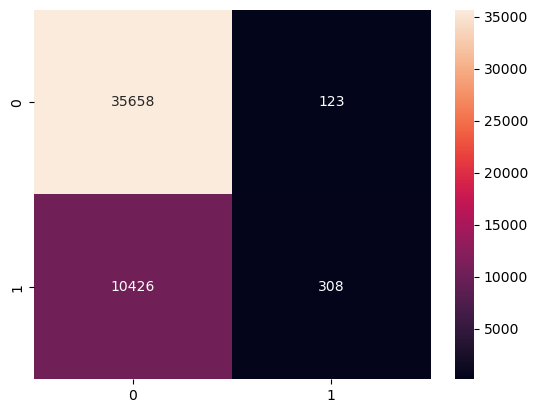

In [50]:
sns.heatmap(confusion_matrix(y_train_res,x_predict),annot=True,fmt='0.5g')

In [51]:
print(classification_report(y_train_res,x_predict))

              precision    recall  f1-score   support

         0.0       0.77      1.00      0.87     35781
         1.0       0.71      0.03      0.06     10734

    accuracy                           0.77     46515
   macro avg       0.74      0.51      0.46     46515
weighted avg       0.76      0.77      0.68     46515



AUC: 0.513


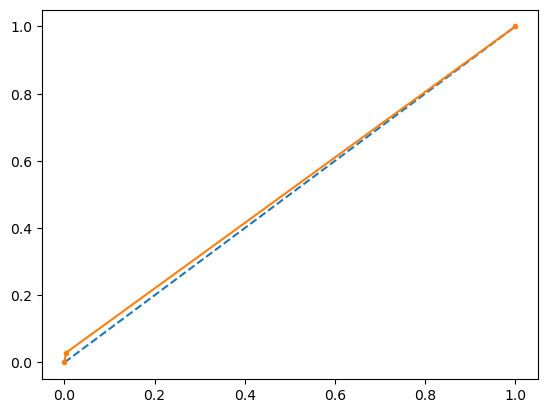

In [52]:
# AUC and ROC for the training data
# calculating on the basis of a person not defaulting
# calculate AUC
auc = roc_auc_score(y_train_res,x_predict)
print('AUC: %.3f' % auc)
# # calculate roc curve
fpr, tpr, thresholds = roc_curve(y_train_res,x_predict)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [53]:
print(confusion_matrix(y_test,y_predict))

[[15262    55]
 [ 1170    16]]


<Axes: >

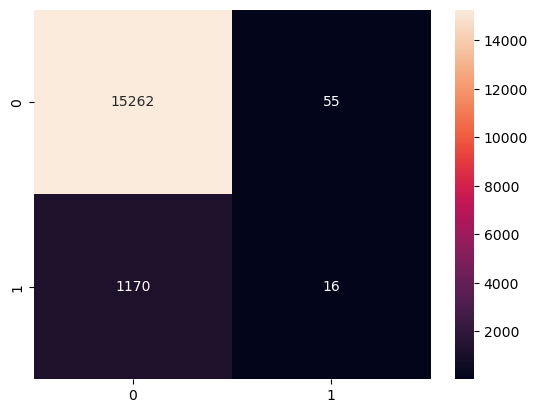

In [54]:
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True,fmt='0.5g')

In [55]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96     15317
         1.0       0.23      0.01      0.03      1186

    accuracy                           0.93     16503
   macro avg       0.58      0.50      0.49     16503
weighted avg       0.88      0.93      0.89     16503



AUC: 0.505


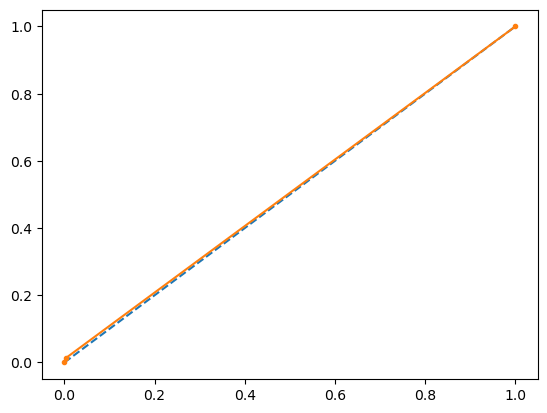

In [56]:
# AUC and ROC for the training data
# calculating on the basis of a person not defaulting
# calculate AUC
auc = roc_auc_score(y_test,y_predict)
print('AUC: %.3f' % auc)
# # calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test,y_predict)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [61]:
import pickle
with open(r'C:\Users\SKAN\Desktop\Raajee\final_project\fin_risk_model2.pkl', 'wb') as file:
    pickle.dump(clf, file)

In [62]:
import pickle
with open(r'C:\Users\SKAN\Desktop\Raajee\final_project\fin_risk_model2.pkl', 'rb') as file:
    svc=pickle.load( file)

In [ ]:
x=df7[["AMT_CREDIT_y","AMT_GOODS_PRICE_y","AMT_INCOME_TOTAL","DAYS_FIRST_DRAWING","AMT_ANNUITY_y","DAYS_FIRST_DUE","AMT_DOWN_PAYMENT","DAYS_TERMINATION","DAYS_EMPLOYED","DAYS_LAST_DUE","AMT_ANNUITY_x","AMT_APPLICATION","AMT_GOODS_PRICE_x","SK_ID_CURR","SELLERPLACE_AREA","DAYS_LAST_DUE_1ST_VERSION","SK_ID_PREV","NAME_HOUSING_TYPE","NAME_EDUCATION_TYPE","HOUR_APPR_PROCESS_START_y","NAME_TYPE_SUITE_y","AMT_CREDIT_x","NAME_INCOME_TYPE","NAME_CONTRACT_TYPE_y","NAME_FAMILY_STATUS"]]

In [5]:
df.head(2)

,Unnamed: 0,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE_x,AMT_ANNUITY_x,AMT_APPLICATION,AMT_CREDIT_x,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_x,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_x,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,TARGET,NAME_CONTRACT_TYPE_y,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_y,AMT_ANNUITY_y,AMT_GOODS_PRICE_y,NAME_TYPE_SUITE_y,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,876718,1327604,127360,Consumer loans,5318.100,27616.5,26082.0,2763.0,27616.5,WEDNESDAY,10,Y,1,0.104322,0.0,0.0,XAP,Approved,-1210,Cash through the bank,XAP,Unknown,New,Mobile,POS,XNA,Country-wide,384,Consumer electronics,6.0,high,POS household with interest,365243.0,-1174.0,-1024.0,-1024.0,-1017.0,0.0,0.0,Cash loans,F,N,Y,4.0,150750.0,360000.0,19660.5,360000.0,Family,Working,Incomplete higher,Separated,House / apartment,0.018029,-14432.0,-106.0,-3010.0,-3946.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,Sales staff,5.0,3.0,3.0,TUESDAY,8.0,0.0,0.0,0.0,0.0,1.0,1.0,Business Entity Type 3,0.498776,0.263144,0.385915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Unknown,Unknown,0.0,Unknown,Unknown,0.0,0.0,0.0,0.0,-1210.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0
1,1463966,1830718,218834,Cash loans,19737.945,135000.0,165226.5,0.0,135000.0,WEDNESDAY,8,Y,1,0.000000,0.0,0.0,XNA,Approved,-1223,XNA,XAP,Unaccompanied,New,

In [63]:
arr=[[360000.0,360000.0,150750.0,365243.0,19660.5,1174.0,2763.0,1017.0,106.0,1024.0,5318.100,27616.5,27616.5,127360,384,1024.0,1327604,0,2,8.0,1,26082.0,0,0,4]]

In [64]:
result=svc.predict(arr)

In [65]:
print(result)

[0.]


# Actual Result is 0 and model predict the Result is 0